In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df_train = pd.read_csv('TRAIN.csv').set_index('LID')
df_train.head(10)

,CHNL,SELLER,ORIGRATE,ORIGUPB,ORIGTERM,ORIGDATE,FSTPAY,LOANAGE,REMMNTHS,ADJRMTHS,...,DLQSTATUS,MODFLAG,MITYPE,RELMORTGIND,ACTPER_MO,ORIGDATE_MO,FSTPAY_MO,MATDT_MO,NMONTHS,FORCLOSED
LID,,,,,,,,,,,,,,,,,,,,,
946681740815,B,"Jpmorgan Chase Bank, National Association",8.000,100000.0,360,32000,52000,1,359,359,...,0,N,NaN,N,4,2,4,363,17,False
921089628109,R,"Gmac Mortgage, Llc",7.625,100000.0,180,42000,62000,0,180,180,...,0,N,NaN,N,4,3,5,184,32,False
738779422112,C,"Flagstar Bank, Fsb",8.000,226000.0,180,32000,52000,1,179,178,...,0,N,NaN,N,4,2,4,183,19,False
615798070845,R,Other,8.205,143000.0,360,32000,52000,0,360,360,...,0,N,NaN,N,3,2,4,363,21,False
345601060557,R,Other,8.500,46000.0,360,32000,52000,0,360,360,...,0,N,NaN,N,3,2,4,363,17,False
726187824996,C,"Jpmorgan Chase Bank, Na",7.750,215000.0,180,32000,52000,0,180,179,...,0,N,NaN,N,3,2,4,183,11,False
627356005769,C,"Gmac Mortgage, Llc",8.625,70000.0,360,42000,62000,1,359,358,...,0,N,NaN,N,5,3,5,364,35,False
634152203488,R,First Tennessee Bank National Association,8.125,128000.0,360,32000,52000,0,360,359,...,0,N,1.0,N,3,2,4,363,20,False
832627229132,R,"Jpmorgan Chase Bank, Na",8.625,112000.0,360,52000,72000,0,360,360,...,0,N,1.0,N,5,4,6,365,48,False


In [31]:
def RelativeMonth(x):
    month=int(x/10000)
    year=int(x-10000*month)
    return((year-2000)*12+month)

In [32]:
df_train["OCLTV"].fillna(1, inplace=True)
df_train["GAP"] = df_train["OLTV"] - df_train["OCLTV"]
df_train["GAP"] = df_train["GAP"].apply(lambda x: 1 if x>0 else 0)

In [33]:
df_train["DATE1"] = df_train["ORIGDATE"].apply(RelativeMonth)
df_train["DATE2"] = df_train["FSTPAY"].apply(RelativeMonth)
df_train["DATE3"] = df_train["MATDT"].apply(RelativeMonth)
df_train["TIMGAP1"] = df_train["DATE2"] - df_train["DATE1"]
df_train["TIMGAP2"] = df_train["DATE3"] - df_train["DATE2"]

In [34]:
df_train.head(10)

,CHNL,SELLER,ORIGRATE,ORIGUPB,ORIGTERM,ORIGDATE,FSTPAY,LOANAGE,REMMNTHS,ADJRMTHS,...,FSTPAY_MO,MATDT_MO,NMONTHS,FORCLOSED,GAP,DATE1,DATE2,DATE3,TIMGAP1,TIMGAP2
LID,,,,,,,,,,,,,,,,,,,,,
946681740815,B,"Jpmorgan Chase Bank, National Association",8.000,100000.0,360,32000,52000,1,359,359,...,4,363,17,False,0,3,5,364,2,359
921089628109,R,"Gmac Mortgage, Llc",7.625,100000.0,180,42000,62000,0,180,180,...,5,184,32,False,0,4,6,185,2,179
738779422112,C,"Flagstar Bank, Fsb",8.000,226000.0,180,32000,52000,1,179,178,...,4,183,19,False,0,3,5,184,2,179
615798070845,R,Other,8.205,143000.0,360,32000,52000,0,360,360,...,4,363,21,False,1,3,5,364,2,359
345601060557,R,Other,8.500,46000.0,360,32000,52000,0,360,360,...,4,363,17,False,1,3,5,364,2,359
726187824996,C,"Jpmorgan Chase Bank, Na",7.750,215000.0,180,32000,52000,0,180,179,...,4,183,11,False,1,3,5,184,2,179
627356005769,C,"Gmac Mortgage, Llc",8.625,70000.0,360,42000,62000,1,359,358,...,5,364,35,False,0,4,6,365,2,359
634152203488,R,First Tennessee Bank National Association,8.125,128000.0,360,32000,52000,0,360,359,...,4,363,20,False,0,3,5,364,2,359
832627229132,R,"Jpmorgan Chase Bank, Na",8.625,112000.0,360,52000,72000,0,360,360,...,6,365,48,False,0,5,7,366,2,359


In [35]:
df_train.describe()

,ORIGRATE,ORIGUPB,ORIGTERM,ORIGDATE,FSTPAY,LOANAGE,REMMNTHS,ADJRMTHS,MATDT,OLTV,...,ORIGDATE_MO,FSTPAY_MO,MATDT_MO,NMONTHS,GAP,DATE1,DATE2,DATE3,TIMGAP1,TIMGAP2
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,199999.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,8.299283,121416.440000,329.531600,40975.225610,58963.939695,0.478755,329.052845,328.061880,49640.795250,76.757834,...,2.604845,4.572735,333.104335,28.072110,0.209120,3.604845,5.572735,334.104335,1.967890,328.531600
std,0.425457,56948.813276,67.001587,14458.304094,11987.572825,1.173612,67.036180,67.456452,12714.191188,16.445143,...,1.437528,1.430262,67.060201,30.035923,0.406681,1.437528,1.430262,67.060201,0.243391,67.001587
min,2.990000,8000.000000,60.000000,11999.000000,12000.000000,-1.000000,56.000000,1.000000,12005.000000,1.000000,...,-12.000000,-11.000000,60.000000,1.000000,0.000000,-11.000000,-10.000000,61.000000,1.000000,59.000000
25%,8.000000,77000.000000,360.000000,32000.000000,52000.000000,0.000000,359.000000,358.000000,42030.000000,70.000000,...,2.000000,4.000000,362.000000,13.000000,0.000000,3.000000,5.000000,363.000000,2.000000,359.000000
50%,8.250000,113000.000000,360.000000,42000.000000,62000.000000,0.000000,360.000000,359.000000,52030.000000,80.000000,...,3.000000,5.000000,363.000000,20.000000,0.000000,4.000000,6.000000,364.000000,2.000000,359.000000
75%,8.500000,157000.000000,360.000000,52000.000000,62000.000000,1.000000,360.000000,360.000000,62015.000000,90.000000,...,4.000000,5.000000,364.000000,32.000000,0.000000,5.000000,6.000000,365.000000,2.000000,359.000000
max,11.500000,486000.000000,360.000000,121999.000000,121999.000000,16.000000,361.000000,360.000000,122029.000000,97.000000,...,5.000000,7.000000,366.000000,242.000000,1.000000,6.000000,8.000000,367.000000,3.000000,359.000000


In [36]:
object_colomn_list = list(df_train.select_dtypes('object').columns)
object_colomn_list

['CHNL',
 'SELLER',
 'FIRSTFLAG',
 'PURPOSE',
 'PROP',
 'OCCSTAT',
 'STATE',
 'IO',
 'MODFLAG',
 'RELMORTGIND']

In [37]:
column_list = list(df_train.columns)
column_list

['CHNL',
 'SELLER',
 'ORIGRATE',
 'ORIGUPB',
 'ORIGTERM',
 'ORIGDATE',
 'FSTPAY',
 'LOANAGE',
 'REMMNTHS',
 'ADJRMTHS',
 'MATDT',
 'OLTV',
 'OCLTV',
 'NUMBO',
 'DTI',
 'CSCOREB',
 'CSCOREC',
 'FIRSTFLAG',
 'PURPOSE',
 'PROP',
 'NO_UNITS',
 'OCCSTAT',
 'STATE',
 'MSA',
 'ZIP',
 'MIPCT',
 'IO',
 'DLQSTATUS',
 'MODFLAG',
 'MITYPE',
 'RELMORTGIND',
 'ACTPER_MO',
 'ORIGDATE_MO',
 'FSTPAY_MO',
 'MATDT_MO',
 'NMONTHS',
 'FORCLOSED',
 'GAP',
 'DATE1',
 'DATE2',
 'DATE3',
 'TIMGAP1',
 'TIMGAP2']

In [38]:
list_name = ["POOL_ID", 
"LOAN_ID", 
"ACT_PERIOD", 
"CHANNEL", 
"SELLER", 
"SERVICER",
"MASTER_SERVICER", 
"ORIG_RATE", 
"CURR_RATE", 
"ORIG_UPB", 
"ISSUANCE_UPB",
"CURRENT_UPB", 
"ORIG_TERM", 
"ORIG_DATE", 
"FIRST_PAY", 
"LOAN_AGE",
"REM_MONTHS", 
"ADJ_REM_MONTHS", 
"MATR_DT", 
"OLTV", 
"OCLTV",
"NUM_BO", 
"DTI", 
"CSCORE_B", 
"CSCORE_C", 
"FIRST_FLAG", 
"PURPOSE",
"PROP", 
"NO_UNITS", 
"OCC_STAT", 
"STATE", 
"MSA", 
"ZIP", 
"MI_PCT",
"PRODUCT", 
"PPMT_FLG", 
"IO", 
"FIRST_PAY_IO", 
"MNTHS_TO_AMTZ_IO",
"DLQ_STATUS", 
"PMT_HISTORY", 
"MOD_FLAG", 
"MI_CANCEL_FLAG", 
"Zero_Bal_Code",
"ZB_DTE", 
"LAST_UPB", 
"RPRCH_DTE", 
"CURR_SCHD_PRNCPL", 
"TOT_SCHD_PRNCPL",
"UNSCHD_PRNCPL_CURR", 
"LAST_PAID_INSTALLMENT_DATE", 
"FORECLOSURE_DATE",
"DISPOSITION_DATE", 
"FORECLOSURE_COSTS", 
"PROPERTY_PRESERVATION_AND_REPAIR_COSTS",
"ASSET_RECOVERY_COSTS", 
"MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
"ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY", 
"NET_SALES_PROCEEDS",
"CREDIT_ENHANCEMENT_PROCEEDS", 
"REPURCHASES_MAKE_WHOLE_PROCEEDS",
"OTHER_FORECLOSURE_PROCEEDS", 
"NON_INTEREST_BEARING_UPB", 
"PRINCIPAL_FORGIVENESS_AMOUNT",
"ORIGINAL_LIST_START_DATE", 
"ORIGINAL_LIST_PRICE", 
"CURRENT_LIST_START_DATE",
"CURRENT_LIST_PRICE", 
"ISSUE_SCOREB", 
"ISSUE_SCOREC", 
"CURR_SCOREB",
"CURR_SCOREC", 
"MI_TYPE", 
"SERV_IND", 
"CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT",
"CUMULATIVE_MODIFICATION_LOSS_AMOUNT", 
"CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS",
"CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS", 
"HOMEREADY_PROGRAM_INDICATOR",
"FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT", 
"RELOCATION_MORTGAGE_INDICATOR",
"ZERO_BALANCE_CODE_CHANGE_DATE", 
"LOAN_HOLDBACK_INDICATOR", 
"LOAN_HOLDBACK_EFFECTIVE_DATE",
"DELINQUENT_ACCRUED_INTEREST", 
"PROPERTY_INSPECTION_WAIVER_INDICATOR",
"HIGH_BALANCE_LOAN_INDICATOR", 
"ARM_5_YR_INDICATOR", 
"ARM_PRODUCT_TYPE",
"MONTHS_UNTIL_FIRST_PAYMENT_RESET", 
"MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET",
"INTEREST_RATE_CHANGE_DATE", 
"PAYMENT_CHANGE_DATE", 
"ARM_INDEX",
"ARM_CAP_STRUCTURE", 
"INITIAL_INTEREST_RATE_CAP", 
"PERIODIC_INTEREST_RATE_CAP",
"LIFETIME_INTEREST_RATE_CAP", 
"MARGIN", 
"BALLOON_INDICATOR",
"PLAN_NUMBER", 
"FORBEARANCE_INDICATOR", 
"HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR",
"DEAL_NAME", 
"RE_PROCS_FLAG", 
"ADR_TYPE", 
"ADR_COUNT", 
"ADR_UPB"]

In [39]:
ab_list_name = ["PID",
"LID", 
"ACTPER", 
"CHNL", 
"SELLER", 
"SERVICER",
"MSERVICER", 
"ORIGRATE", 
"CURRRATE", 
"ORIGUPB", 
"ISSUPB",
"CURRUPB", 
"ORIGTERM", 
"ORIGDATE", 
"FSTPAY", 
"LOANAGE",
"REMMNTHS", 
"ADJRMTHS", 
"MATDT", 
"OLTV", 
"OCLTV",
"NUMBO", 
"DTI", 
"CSCOREB", 
"CSCOREC", 
"FIRSTFLAG", 
"PURPOSE",
"PROP", 
"NO_UNITS", 
"OCCSTAT", 
"STATE", 
"MSA", 
"ZIP", 
"MIPCT",
"PRODUCT", 
"PPMTFLG", 
"IO", 
"FIRSTPAYIO", 
"MNTHSTOAMTZO",
"DLQSTATUS", 
"PMTHIST", 
"MODFLAG", 
"MICANCFLAG", 
"ZBCODE",
"ZBDTE", 
"LASTUPB", 
"RPRCHDTE", 
"CURRSCHDPR", 
"TOTSCHDPR",
"UNSCHDPRCURR", 
"LSTPDINSTDT", 
"FORCLDATE",
"DISPDATE", 
"FORCLCSTS", 
"PROPERTYPRCSTS",
"ASSTRECCSTS", 
"MISCHEXPCRDTS",
"ASSTAXHPRPTY", 
"NETSALESPROCS",
"CREDTENHANPROCS", 
"REPMAKEWHLPROCS",
"OTHFOREPROCS", 
"NONINTBRNGUPB", 
"PRFORGAMT",
"ORIGLSTSTDT", 
"ORIGLISTPR", 
"CURLSTSTRTDT",
"CURRLISTPR", 
"ISSUESCOREB", 
"ISSUESCOREC", 
"CURRSCOREB",
"CURRSCOREC", 
"MITYPE", 
"SERVIND", 
"CURRPERMODLOSSAMT",
"CUMMODLOSSAMT", 
"CURRPERCREDEVGNLS",
"CUMCRDEVTNTGNLS", 
"HRDYPROGIND",
"FORPRINCWROFFAMT", 
"RELMORTGIND",
"ZBALCODECHGDT", 
"LNHBIND", 
"LNHBEFFDT",
"DELACCINT", 
"PRTYINSPWAIVIND",
"HIBALLNIND", 
"ARM5YRIND", 
"ARMPRDTYPE",
"MTHSTIL1STPMNTRST", 
"MNTHSBETWSUBSPMNTRST",
"IRATECHDT", 
"PMTCHDT", 
"ARMINDEX",
"ARMCASTR", 
"INITINTRATECAP", 
"PERINTRATECAP",
"LTINTRATECAP", 
"MARGIN", 
"BALLIND",
"PNUMBER", 
"FORBINDR", 
"HLOAN2VALHLTVREFOPTIND",
"DLNAME", 
"REPROCSFL", 
"ADRTYPE", 
"ADRCOUNT", 
"ADRUPB"]

In [40]:
columns_name_dict = dict(zip(ab_list_name, list_name))

In [41]:
column_list_full = []
for name_i in column_list:
    try:
        full_name_i = columns_name_dict[name_i]
        column_list_full.append(full_name_i)
    except:
        column_list_full.append('Null')

In [42]:
column_list_full 

['CHANNEL',
 'SELLER',
 'ORIG_RATE',
 'ORIG_UPB',
 'ORIG_TERM',
 'ORIG_DATE',
 'FIRST_PAY',
 'LOAN_AGE',
 'REM_MONTHS',
 'ADJ_REM_MONTHS',
 'MATR_DT',
 'OLTV',
 'OCLTV',
 'NUM_BO',
 'DTI',
 'CSCORE_B',
 'CSCORE_C',
 'FIRST_FLAG',
 'PURPOSE',
 'PROP',
 'NO_UNITS',
 'OCC_STAT',
 'STATE',
 'MSA',
 'ZIP',
 'MI_PCT',
 'IO',
 'DLQ_STATUS',
 'MOD_FLAG',
 'MI_TYPE',
 'RELOCATION_MORTGAGE_INDICATOR',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null']

In [43]:
df_train.shape

(200000, 43)

In [44]:
df_train.isnull().sum()

CHNL                0
SELLER              0
ORIGRATE            0
ORIGUPB             0
ORIGTERM            0
ORIGDATE            0
FSTPAY              0
LOANAGE             0
REMMNTHS            0
ADJRMTHS            0
MATDT               0
OLTV                1
OCLTV               0
NUMBO              86
DTI              7511
CSCOREB          3867
CSCOREC        104041
FIRSTFLAG         112
PURPOSE             0
PROP                0
NO_UNITS            0
OCCSTAT             0
STATE               0
MSA                 0
ZIP                 0
MIPCT          132546
IO             194589
DLQSTATUS           0
MODFLAG             0
MITYPE         132546
RELMORTGIND         0
ACTPER_MO           0
ORIGDATE_MO         0
FSTPAY_MO           0
MATDT_MO            0
NMONTHS             0
FORCLOSED           0
GAP                 0
DATE1               0
DATE2               0
DATE3               0
TIMGAP1             0
TIMGAP2             0
dtype: int64

In [45]:
df_train_1 = df_train.drop(['CSCOREC', 'MIPCT', 'IO', 'MITYPE'], axis=1).dropna()
df_train_1.head()

,CHNL,SELLER,ORIGRATE,ORIGUPB,ORIGTERM,ORIGDATE,FSTPAY,LOANAGE,REMMNTHS,ADJRMTHS,...,FSTPAY_MO,MATDT_MO,NMONTHS,FORCLOSED,GAP,DATE1,DATE2,DATE3,TIMGAP1,TIMGAP2
LID,,,,,,,,,,,,,,,,,,,,,
946681740815,B,"Jpmorgan Chase Bank, National Association",8.000,100000.0,360,32000,52000,1,359,359,...,4,363,17,False,0,3,5,364,2,359
921089628109,R,"Gmac Mortgage, Llc",7.625,100000.0,180,42000,62000,0,180,180,...,5,184,32,False,0,4,6,185,2,179
738779422112,C,"Flagstar Bank, Fsb",8.000,226000.0,180,32000,52000,1,179,178,...,4,183,19,False,0,3,5,184,2,179
615798070845,R,Other,8.205,143000.0,360,32000,52000,0,360,360,...,4,363,21,False,1,3,5,364,2,359
345601060557,R,Other,8.500,46000.0,360,32000,52000,0,360,360,...,4,363,17,False,1,3,5,364,2,359


In [46]:
df_train_1.shape

(188742, 39)

In [47]:
df_train_1 = df_train_1.drop(['ORIGDATE', 'FSTPAY', 'MATDT', 'ORIGDATE_MO', 'FSTPAY_MO', 'MATDT_MO', 'DATE1', 'DATE2', 'DATE3'], axis=1)
df_train_1.head(10)

,CHNL,SELLER,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,REMMNTHS,ADJRMTHS,OLTV,OCLTV,...,ZIP,DLQSTATUS,MODFLAG,RELMORTGIND,ACTPER_MO,NMONTHS,FORCLOSED,GAP,TIMGAP1,TIMGAP2
LID,,,,,,,,,,,,,,,,,,,,,
946681740815,B,"Jpmorgan Chase Bank, National Association",8.000,100000.0,360,1,359,359,51.0,51.0,...,300,0,N,N,4,17,False,0,2,359
921089628109,R,"Gmac Mortgage, Llc",7.625,100000.0,180,0,180,180,80.0,80.0,...,932,0,N,N,4,32,False,0,2,179
738779422112,C,"Flagstar Bank, Fsb",8.000,226000.0,180,1,179,178,80.0,80.0,...,981,0,N,N,4,19,False,0,2,179
615798070845,R,Other,8.205,143000.0,360,0,360,360,77.0,1.0,...,875,0,N,N,3,21,False,1,2,359
345601060557,R,Other,8.500,46000.0,360,0,360,360,80.0,1.0,...,622,0,N,N,3,17,False,1,2,359
726187824996,C,"Jpmorgan Chase Bank, Na",7.750,215000.0,180,0,180,179,80.0,1.0,...,804,0,N,N,3,11,False,1,2,179
627356005769,C,"Gmac Mortgage, Llc",8.625,70000.0,360,1,359,358,33.0,33.0,...,360,0,N,N,5,35,False,0,2,359
634152203488,R,First Tennessee Bank National Association,8.125,128000.0,360,0,360,359,95.0,95.0,...,301,0,N,N,3,20,False,0,2,359
832627229132,R,"Jpmorgan Chase Bank, Na",8.625,112000.0,360,0,360,360,95.0,95.0,...,333,0,N,N,5,48,False,0,2,359


In [48]:
df_train_1 = df_train_1.drop(['ZIP', 'MSA', 'OCLTV'], axis=1)
df_train_1

,CHNL,SELLER,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,REMMNTHS,ADJRMTHS,OLTV,NUMBO,...,STATE,DLQSTATUS,MODFLAG,RELMORTGIND,ACTPER_MO,NMONTHS,FORCLOSED,GAP,TIMGAP1,TIMGAP2
LID,,,,,,,,,,,,,,,,,,,,,
946681740815,B,"Jpmorgan Chase Bank, National Association",8.000,100000.0,360,1,359,359,51.0,2.0,...,GA,0,N,N,4,17,False,0,2,359
921089628109,R,"Gmac Mortgage, Llc",7.625,100000.0,180,0,180,180,80.0,1.0,...,CA,0,N,N,4,32,False,0,2,179
738779422112,C,"Flagstar Bank, Fsb",8.000,226000.0,180,1,179,178,80.0,2.0,...,WA,0,N,N,4,19,False,0,2,179
615798070845,R,Other,8.205,143000.0,360,0,360,360,77.0,2.0,...,NM,0,N,N,3,21,False,1,2,359
345601060557,R,Other,8.500,46000.0,360,0,360,360,80.0,2.0,...,IL,0,N,N,3,17,False,1,2,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562335400010,R,"Bank Of America, N.A.",8.250,96000.0,360,0,360,360,80.0,1.0,...,AZ,0,N,N,3,14,False,1,2,359
151011432193,C,Suntrust Mortgage Inc.,8.875,86000.0,360,0,360,360,59.0,2.0,...,MI,0,N,N,3,23,False,0,2,359
517753415065,R,Bishops Gate Residential Mortgage Trust,8.500,70000.0,360,0,360,359,64.0,1.0,...,NJ,0,N,N,5,17,False,0,2,359


In [49]:
for name_i in list(df_train_1.select_dtypes('object').columns):
    print(name_i)
    print(df_train_1.loc[:, name_i].value_counts())
    print('\n')

CHNL
R    93739
C    54654
B    40349
Name: CHNL, dtype: int64


SELLER
Other                                        45827
Jpmorgan Chase Bank, Na                      36062
Bank Of America, N.A.                        22263
Citimortgage, Inc.                           10002
Jpmorgan Chase Bank, National Association     9649
Suntrust Mortgage Inc.                        9176
Bishops Gate Residential Mortgage Trust       7474
Gmac Mortgage, Llc                            6583
First Tennessee Bank National Association     6076
Flagstar Bank, Fsb                            5802
Wells Fargo Bank, N.A.                        5419
Amtrust Bank                                  4742
Netbank Funding Services                      4483
Regions Bank                                  3567
Jp Morgan Chase Bank, Na                      3369
Usaa Federal Savings Bank                     2191
Harwood Street Funding I, Llc                 1911
Rbc Mortgage Company                          1738
Pnc Bank, 

In [50]:
df_train_1 = df_train_1.drop(['MODFLAG'], axis=1)
df_train_1

,CHNL,SELLER,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,REMMNTHS,ADJRMTHS,OLTV,NUMBO,...,OCCSTAT,STATE,DLQSTATUS,RELMORTGIND,ACTPER_MO,NMONTHS,FORCLOSED,GAP,TIMGAP1,TIMGAP2
LID,,,,,,,,,,,,,,,,,,,,,
946681740815,B,"Jpmorgan Chase Bank, National Association",8.000,100000.0,360,1,359,359,51.0,2.0,...,P,GA,0,N,4,17,False,0,2,359
921089628109,R,"Gmac Mortgage, Llc",7.625,100000.0,180,0,180,180,80.0,1.0,...,P,CA,0,N,4,32,False,0,2,179
738779422112,C,"Flagstar Bank, Fsb",8.000,226000.0,180,1,179,178,80.0,2.0,...,P,WA,0,N,4,19,False,0,2,179
615798070845,R,Other,8.205,143000.0,360,0,360,360,77.0,2.0,...,P,NM,0,N,3,21,False,1,2,359
345601060557,R,Other,8.500,46000.0,360,0,360,360,80.0,2.0,...,P,IL,0,N,3,17,False,1,2,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562335400010,R,"Bank Of America, N.A.",8.250,96000.0,360,0,360,360,80.0,1.0,...,P,AZ,0,N,3,14,False,1,2,359
151011432193,C,Suntrust Mortgage Inc.,8.875,86000.0,360,0,360,360,59.0,2.0,...,P,MI,0,N,3,23,False,0,2,359
517753415065,R,Bishops Gate Residential Mortgage Trust,8.500,70000.0,360,0,360,359,64.0,1.0,...,P,NJ,0,N,5,17,False,0,2,359


In [51]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188742 entries, 946681740815 to 603343045348
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CHNL         188742 non-null  object 
 1   SELLER       188742 non-null  object 
 2   ORIGRATE     188742 non-null  float64
 3   ORIGUPB      188742 non-null  float64
 4   ORIGTERM     188742 non-null  int64  
 5   LOANAGE      188742 non-null  int64  
 6   REMMNTHS     188742 non-null  int64  
 7   ADJRMTHS     188742 non-null  int64  
 8   OLTV         188742 non-null  float64
 9   NUMBO        188742 non-null  float64
 10  DTI          188742 non-null  float64
 11  CSCOREB      188742 non-null  float64
 12  FIRSTFLAG    188742 non-null  object 
 13  PURPOSE      188742 non-null  object 
 14  PROP         188742 non-null  object 
 15  NO_UNITS     188742 non-null  int64  
 16  OCCSTAT      188742 non-null  object 
 17  STATE        188742 non-null  object 
 18  DLQSTAT

In [52]:
df_train_1 = df_train_1.drop(['NMONTHS', 'FORCLOSED'], axis=1)
df_train_1['NMONTHS'] = df_train['NMONTHS']
df_train_1['FORCLOSED'] = df_train['FORCLOSED']

In [53]:
df_train_1

,CHNL,SELLER,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,REMMNTHS,ADJRMTHS,OLTV,NUMBO,...,OCCSTAT,STATE,DLQSTATUS,RELMORTGIND,ACTPER_MO,GAP,TIMGAP1,TIMGAP2,NMONTHS,FORCLOSED
LID,,,,,,,,,,,,,,,,,,,,,
946681740815,B,"Jpmorgan Chase Bank, National Association",8.000,100000.0,360,1,359,359,51.0,2.0,...,P,GA,0,N,4,0,2,359,17,False
921089628109,R,"Gmac Mortgage, Llc",7.625,100000.0,180,0,180,180,80.0,1.0,...,P,CA,0,N,4,0,2,179,32,False
738779422112,C,"Flagstar Bank, Fsb",8.000,226000.0,180,1,179,178,80.0,2.0,...,P,WA,0,N,4,0,2,179,19,False
615798070845,R,Other,8.205,143000.0,360,0,360,360,77.0,2.0,...,P,NM,0,N,3,1,2,359,21,False
345601060557,R,Other,8.500,46000.0,360,0,360,360,80.0,2.0,...,P,IL,0,N,3,1,2,359,17,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562335400010,R,"Bank Of America, N.A.",8.250,96000.0,360,0,360,360,80.0,1.0,...,P,AZ,0,N,3,1,2,359,14,False
151011432193,C,Suntrust Mortgage Inc.,8.875,86000.0,360,0,360,360,59.0,2.0,...,P,MI,0,N,3,0,2,359,23,False
517753415065,R,Bishops Gate Residential Mortgage Trust,8.500,70000.0,360,0,360,359,64.0,1.0,...,P,NJ,0,N,5,0,2,359,17,False


In [54]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188742 entries, 946681740815 to 603343045348
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CHNL         188742 non-null  object 
 1   SELLER       188742 non-null  object 
 2   ORIGRATE     188742 non-null  float64
 3   ORIGUPB      188742 non-null  float64
 4   ORIGTERM     188742 non-null  int64  
 5   LOANAGE      188742 non-null  int64  
 6   REMMNTHS     188742 non-null  int64  
 7   ADJRMTHS     188742 non-null  int64  
 8   OLTV         188742 non-null  float64
 9   NUMBO        188742 non-null  float64
 10  DTI          188742 non-null  float64
 11  CSCOREB      188742 non-null  float64
 12  FIRSTFLAG    188742 non-null  object 
 13  PURPOSE      188742 non-null  object 
 14  PROP         188742 non-null  object 
 15  NO_UNITS     188742 non-null  int64  
 16  OCCSTAT      188742 non-null  object 
 17  STATE        188742 non-null  object 
 18  DLQSTAT

In [55]:
df_train_1.to_csv('TRAIN_ver04.csv')

In [56]:
df_train_1.describe()

,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,REMMNTHS,ADJRMTHS,OLTV,NUMBO,DTI,CSCOREB,NO_UNITS,DLQSTATUS,ACTPER_MO,GAP,TIMGAP1,TIMGAP2,NMONTHS
count,188742.000000,188742.000000,188742.000000,188742.000000,188742.000000,188742.000000,188742.000000,188742.000000,188742.000000,188742.000000,188742.000000,188742.000000,188742.000000,188742.000000,188742.000000,188742.000000,188742.000000
mean,8.295631,121335.521506,329.476889,0.481753,328.995136,328.007476,76.839135,1.615131,34.913888,717.403572,1.032166,0.001547,4.052580,0.209053,1.968099,328.476889,28.032722
std,0.425152,56773.412414,67.060444,1.178867,67.093182,67.508537,16.392573,0.512395,11.943804,55.057806,0.220297,0.041018,0.815603,0.406633,0.243413,67.060444,29.960248
min,2.990000,8000.000000,60.000000,-1.000000,56.000000,1.000000,1.000000,1.000000,1.000000,356.000000,1.000000,0.000000,3.000000,0.000000,1.000000,59.000000,1.000000
25%,8.000000,77000.000000,360.000000,0.000000,359.000000,358.000000,71.000000,1.000000,26.000000,679.000000,1.000000,0.000000,3.000000,0.000000,2.000000,359.000000,13.000000
50%,8.250000,113000.000000,360.000000,0.000000,360.000000,359.000000,80.000000,2.000000,35.000000,726.000000,1.000000,0.000000,4.000000,0.000000,2.000000,359.000000,20.000000
75%,8.500000,157000.000000,360.000000,1.000000,360.000000,360.000000,90.000000,2.000000,43.000000,762.000000,1.000000,0.000000,5.000000,0.000000,2.000000,359.000000,32.000000
max,11.500000,486000.000000,360.000000,16.000000,361.000000,360.000000,97.000000,10.000000,64.000000,838.000000,4.000000,4.000000,5.000000,1.000000,3.000000,359.000000,242.000000


In [57]:
from scipy import stats

In [58]:
f, p = stats.f_oneway(*[df_train_1[df_train_1['STATE']==i]['NMONTHS'] for i in list(df_train_1['STATE'].unique())])
f, p

(130.27645431569246, 0.0)

In [59]:
for name_i in list(df_train_1.select_dtypes('object').columns):
    print(name_i)
    f, p = stats.f_oneway(*[df_train_1[df_train_1[name_i]==i]['NMONTHS'] for i in list(df_train_1[name_i].unique())])
    print(f'p-value={p}')
    print('\n')

CHNL
p-value=2.4510702597652037e-60


SELLER
p-value=0.0


FIRSTFLAG
p-value=0.008602763548104502


PURPOSE
p-value=0.0


PROP
p-value=1.1018191059329886e-302


OCCSTAT
p-value=4.5076791297115424e-148


STATE
p-value=0.0


RELMORTGIND
p-value=0.4402442764671094




In [60]:
for name_i in list(df_train_1.select_dtypes('object').columns):
    print(name_i)
    f, p = stats.f_oneway(*[df_train_1[df_train_1[name_i]==i]['FORCLOSED'] for i in list(df_train_1[name_i].unique())])
    print(f'p-value={p}')
    print('\n')

CHNL
p-value=1.1903643440353245e-32


SELLER
p-value=2.2518175934986562e-07


FIRSTFLAG
p-value=0.010531235590164875


PURPOSE
p-value=6.135771204485942e-61


PROP
p-value=4.673870561992029e-114


OCCSTAT
p-value=4.5704428816928974e-18


STATE
p-value=7.112213305080955e-152


RELMORTGIND
p-value=0.00027506877083479275




In [61]:
df_train_1['NO_UNITS'] = df_train_1['NO_UNITS'].astype('object')

In [62]:
list(df_train_1.select_dtypes('object').columns)

['CHNL',
 'SELLER',
 'FIRSTFLAG',
 'PURPOSE',
 'PROP',
 'NO_UNITS',
 'OCCSTAT',
 'STATE',
 'RELMORTGIND']

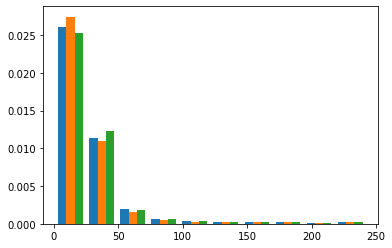

In [85]:
plt.hist([df_train_1[df_train_1['CHNL']=='B']['NMONTHS'], df_train_1[df_train_1['CHNL']=='C']['NMONTHS'], df_train_1[df_train_1['CHNL']=='R']['NMONTHS']], density=True)
plt.show()

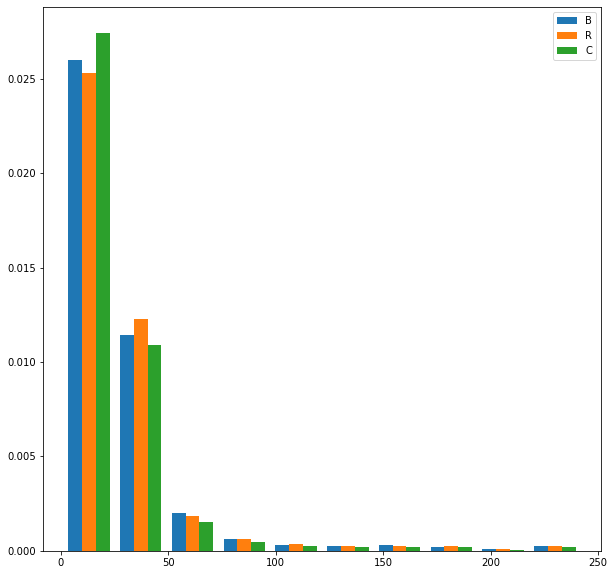

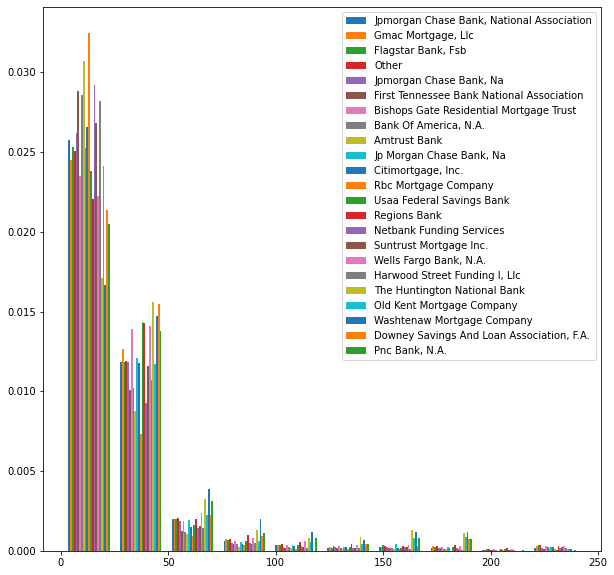

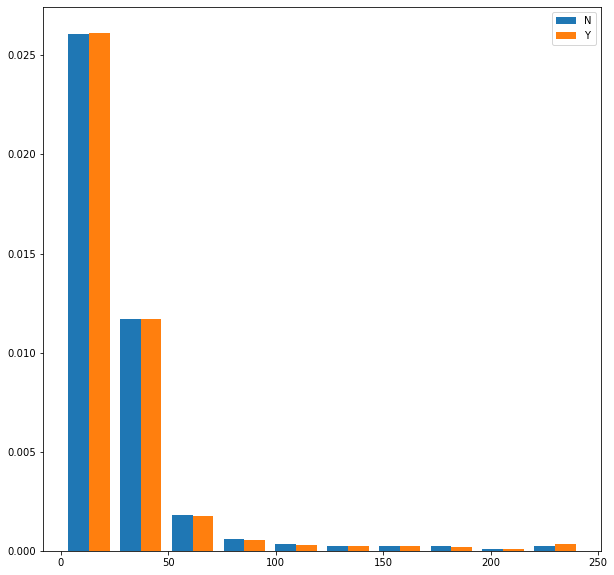

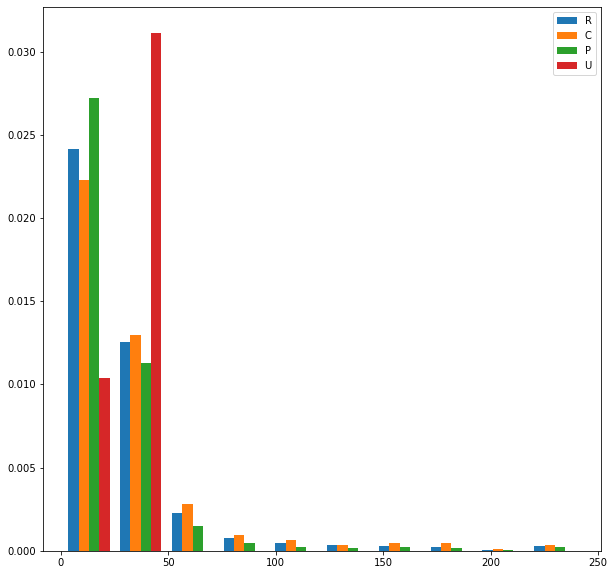

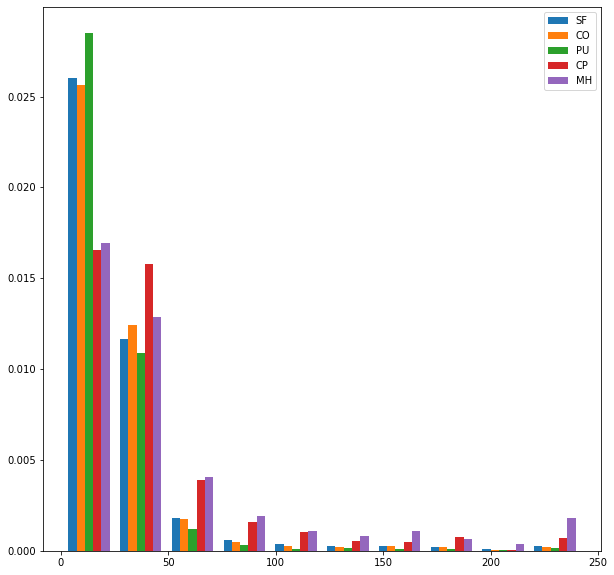

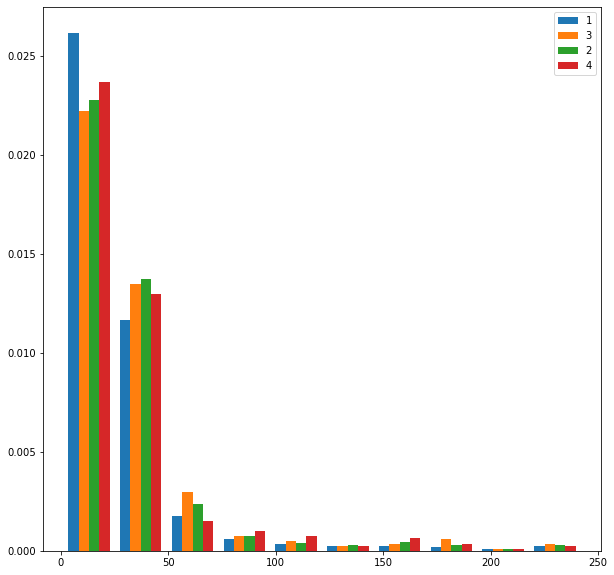

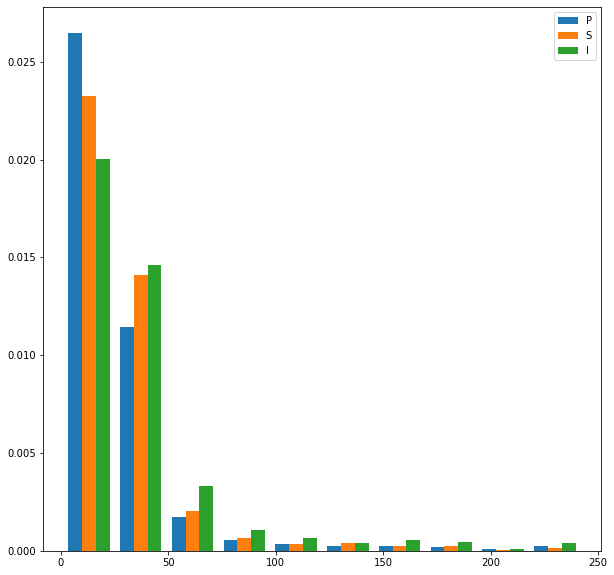

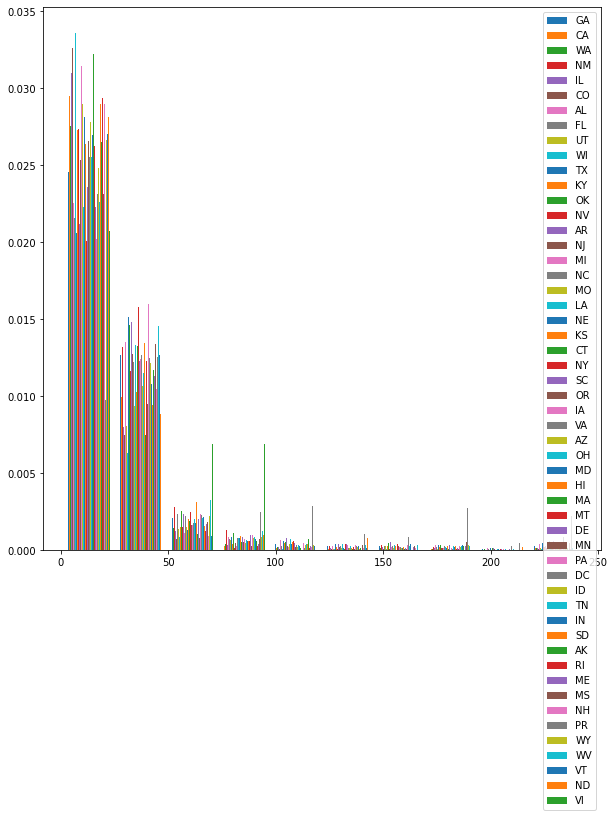

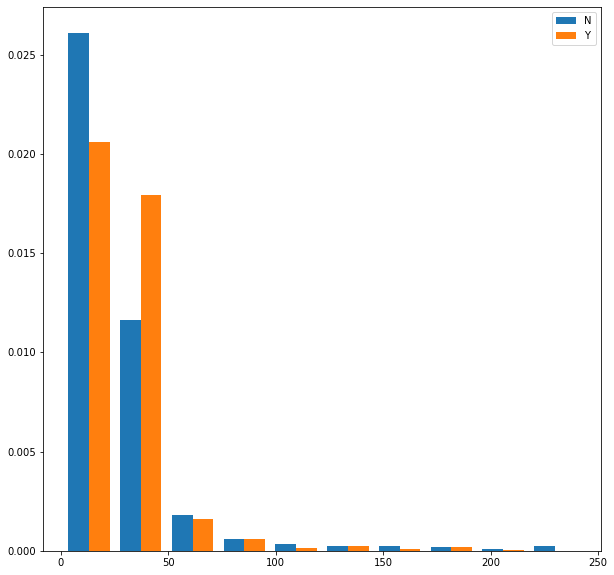

In [96]:
for name_i in list(df_train_1.select_dtypes('object').columns):
    plt.figure(figsize=(10, 10))
    plt.hist([df_train_1[df_train_1[name_i]==type_i]['NMONTHS'] for type_i in df_train_1[name_i].unique()],
             bins=10,
             density=True,
             label=df_train_1[name_i].unique())
    plt.legend(loc=1)
    plt.show()

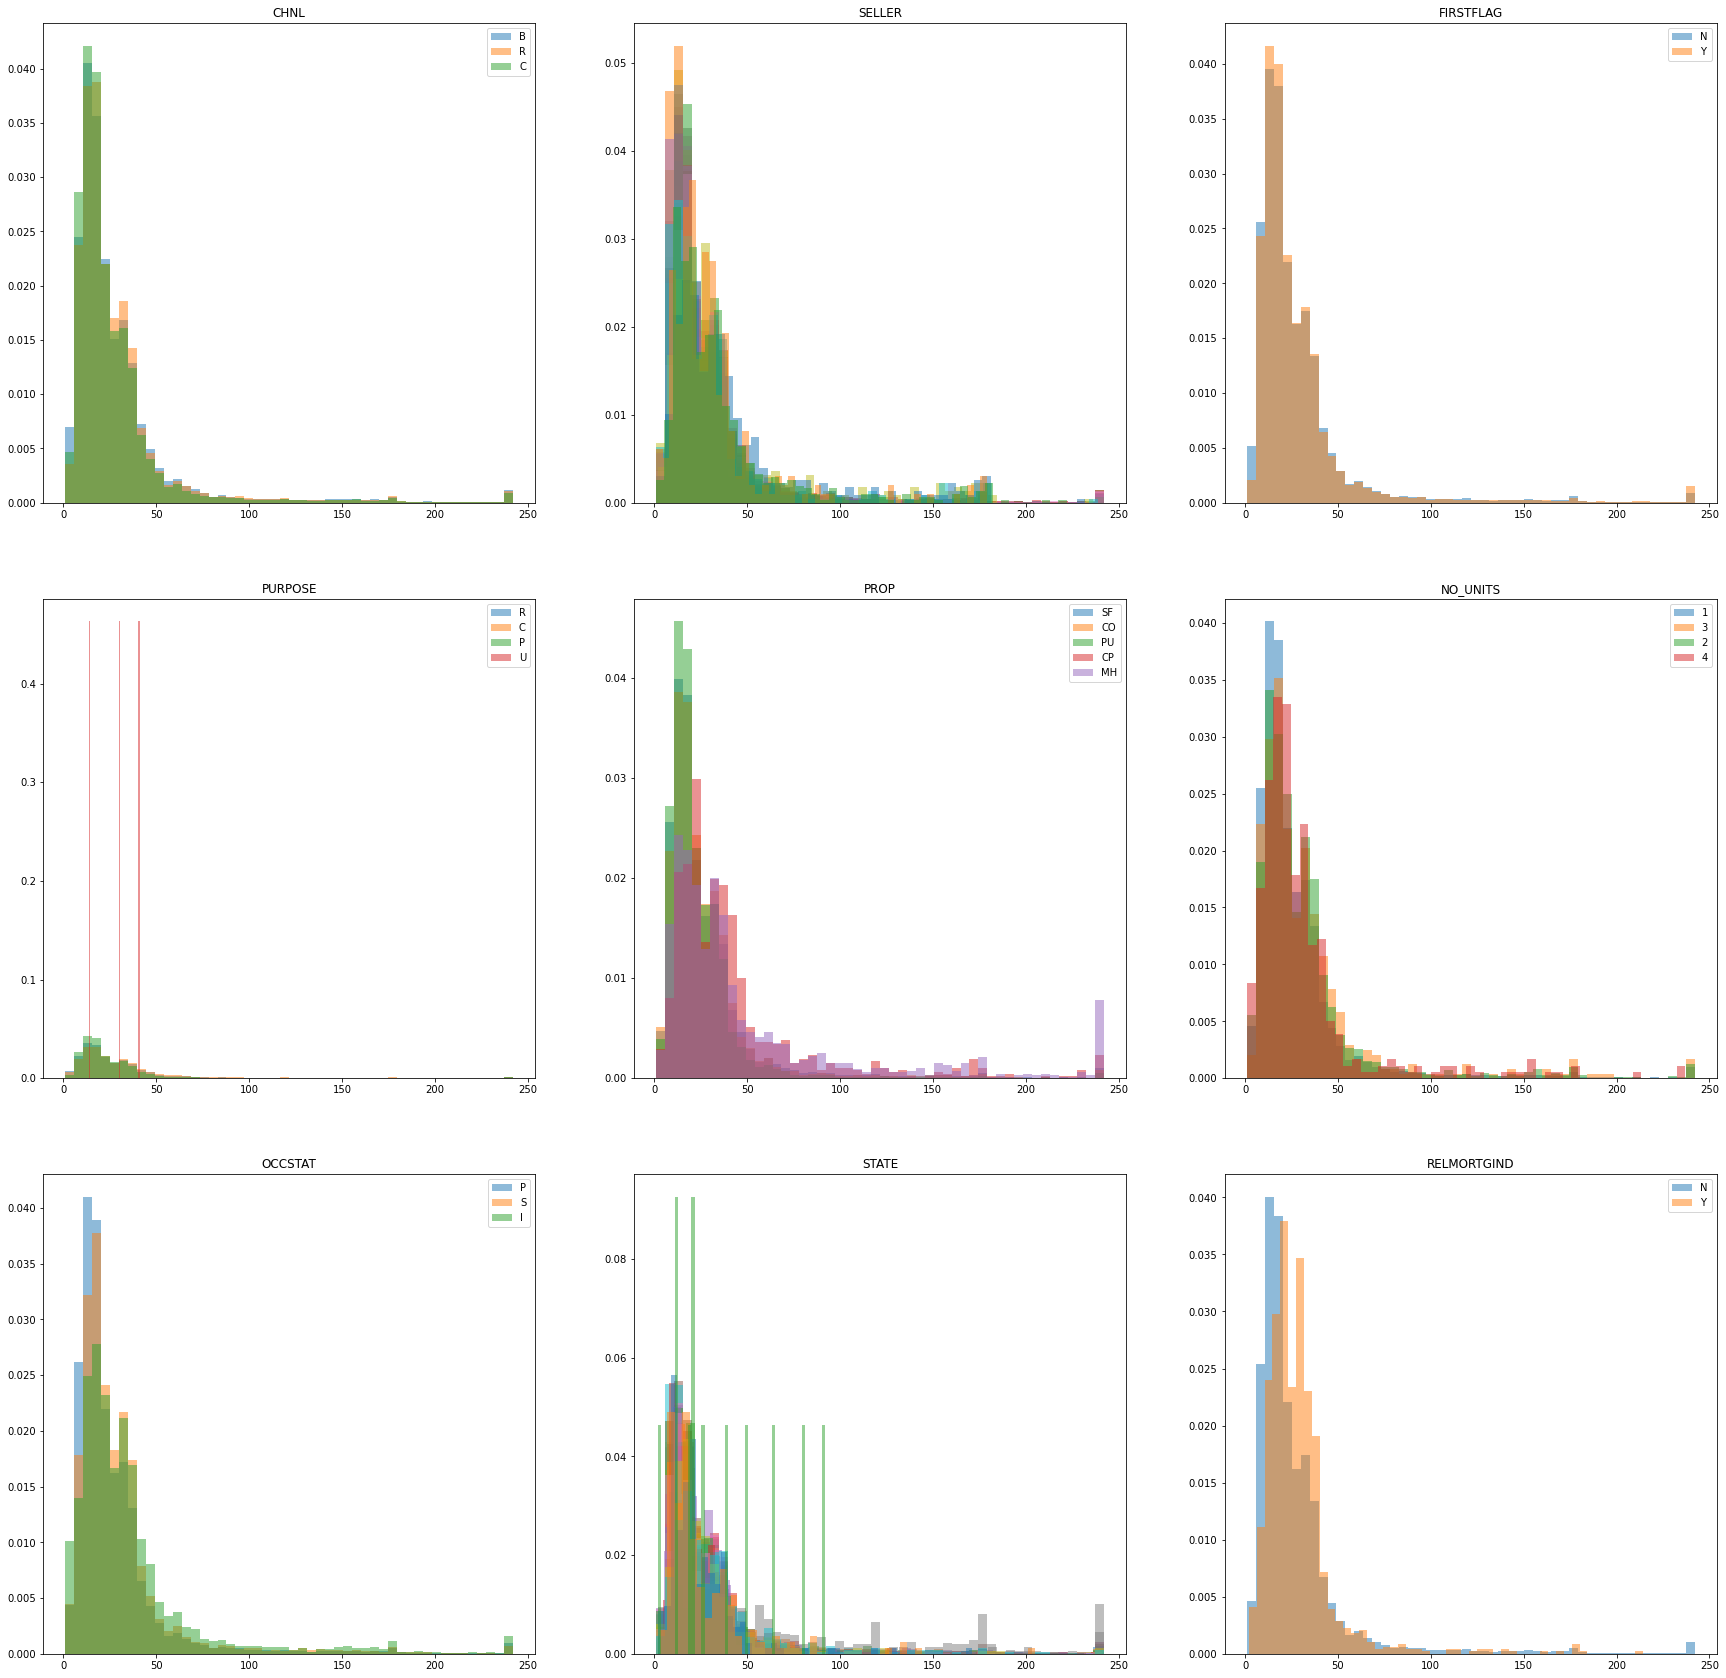

In [114]:
plt.figure(figsize=(30, 30))
for i, name_i in enumerate(list(df_train_1.select_dtypes('object').columns)):
    plt.subplot(3,3,i+1)
    if name_i == 'SELLER' or name_i == 'STATE':
        for type_i in df_train_1[name_i].unique():
            plt.hist([df_train_1[df_train_1[name_i]==type_i]['NMONTHS']], bins=50, alpha=0.5, density=True)
            plt.title(name_i)
    else:
        for type_i in df_train_1[name_i].unique():
            plt.hist([df_train_1[df_train_1[name_i]==type_i]['NMONTHS']], bins=50, label=type_i, alpha=0.5, density=True)
            plt.legend(loc=1)
            plt.title(name_i)

plt.show()

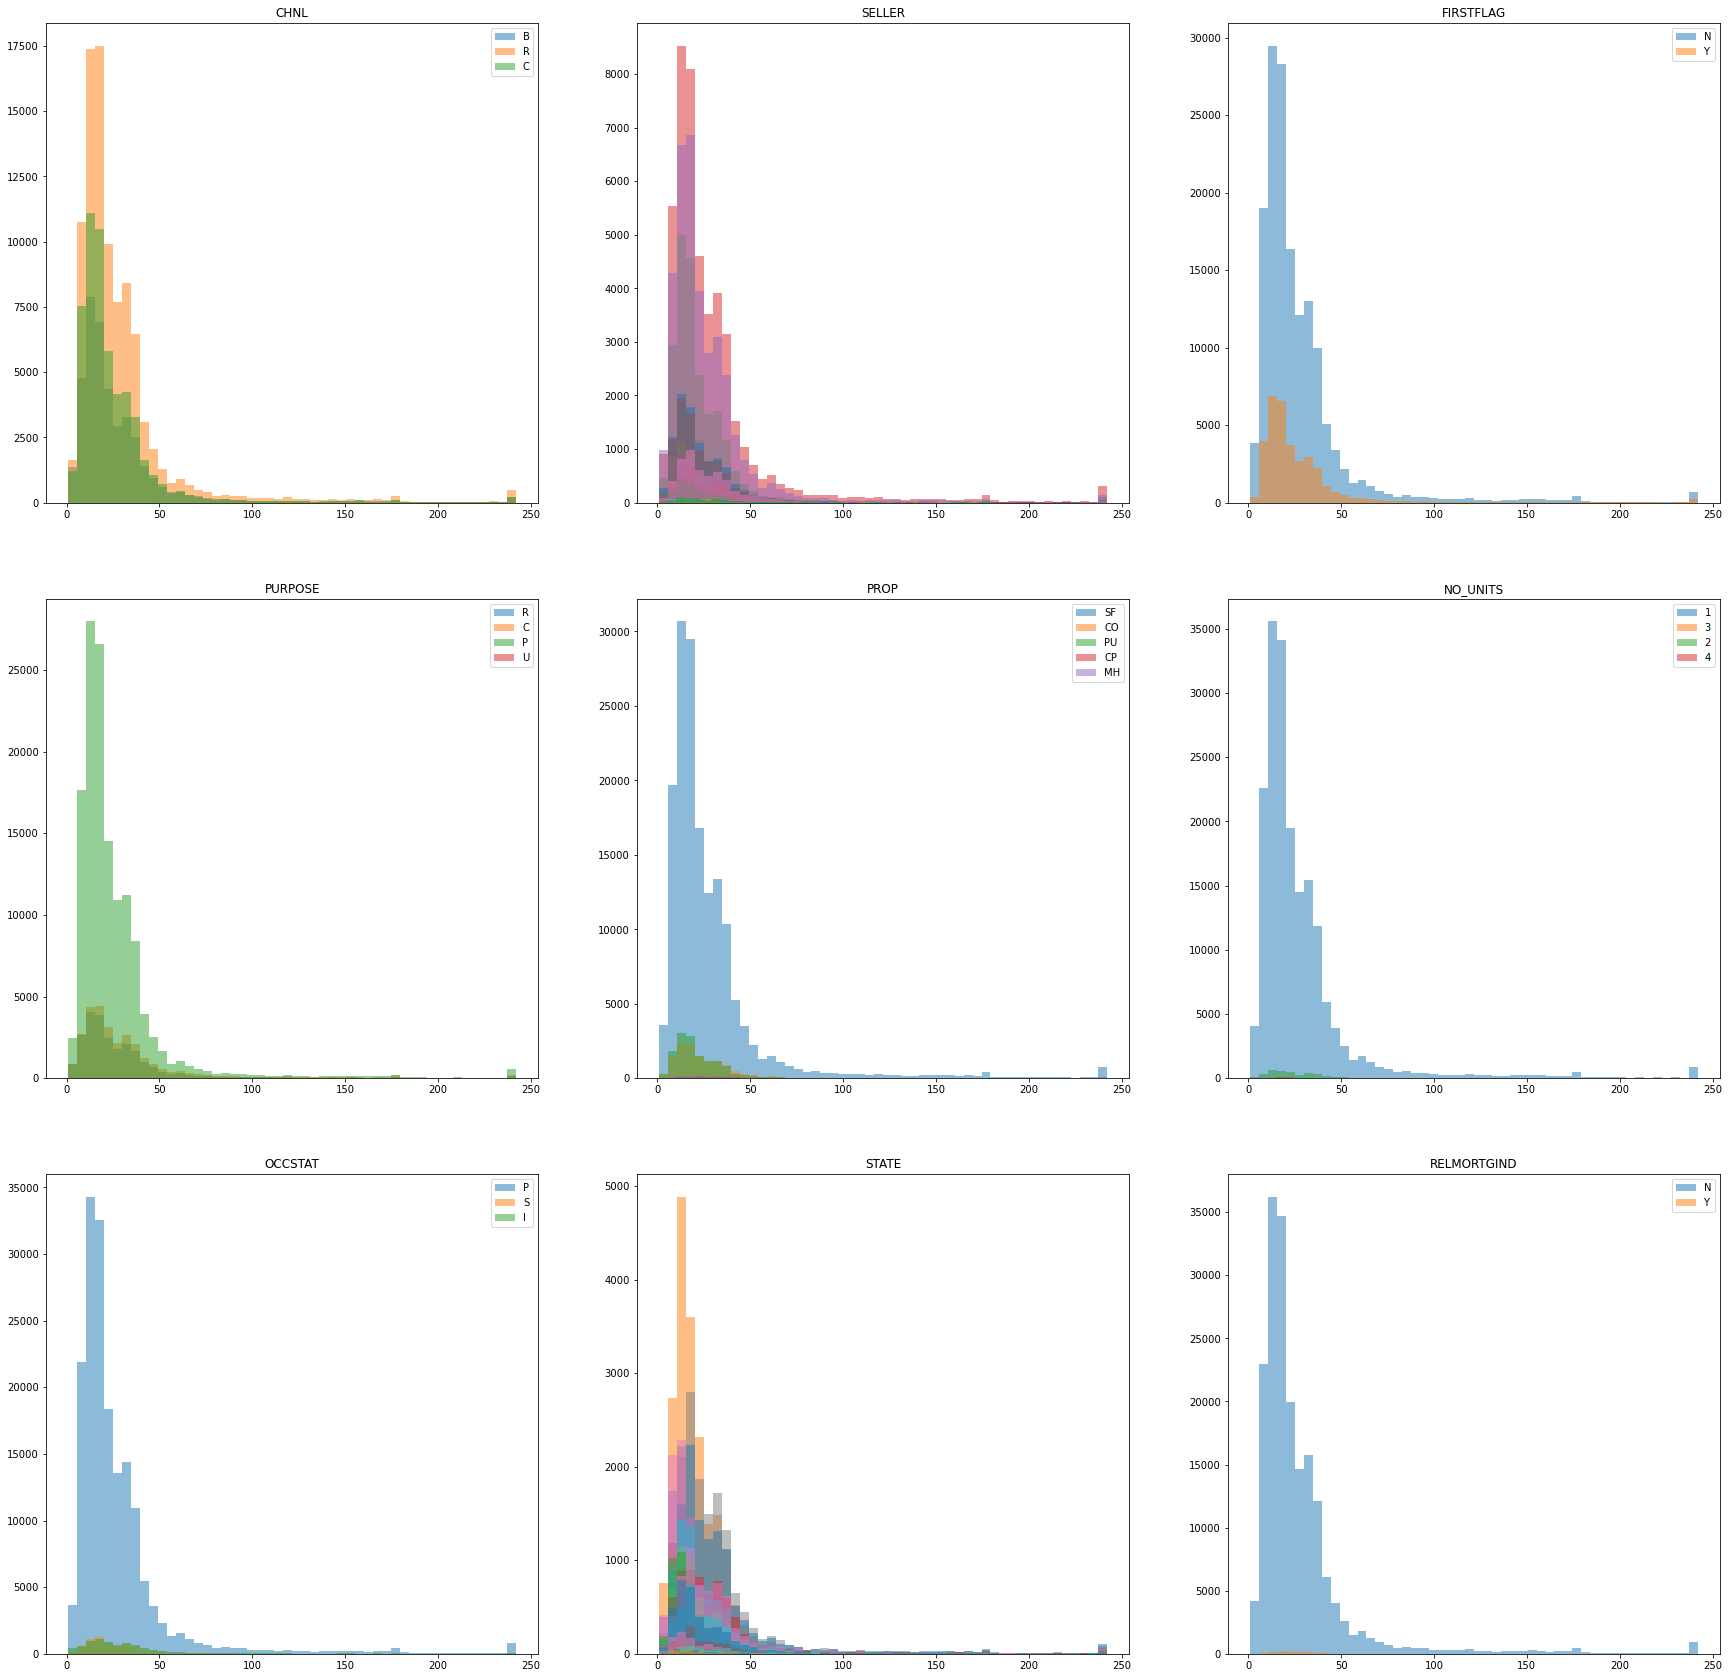

In [115]:
plt.figure(figsize=(30, 30))
for i, name_i in enumerate(list(df_train_1.select_dtypes('object').columns)):
    plt.subplot(3,3,i+1)
    if name_i == 'SELLER' or name_i == 'STATE':
        for type_i in df_train_1[name_i].unique():
            plt.hist([df_train_1[df_train_1[name_i]==type_i]['NMONTHS']], bins=50, alpha=0.5)
            plt.title(name_i)
    else:
        for type_i in df_train_1[name_i].unique():
            plt.hist([df_train_1[df_train_1[name_i]==type_i]['NMONTHS']], bins=50, label=type_i, alpha=0.5)
            plt.legend(loc=1)
            plt.title(name_i)

plt.show()

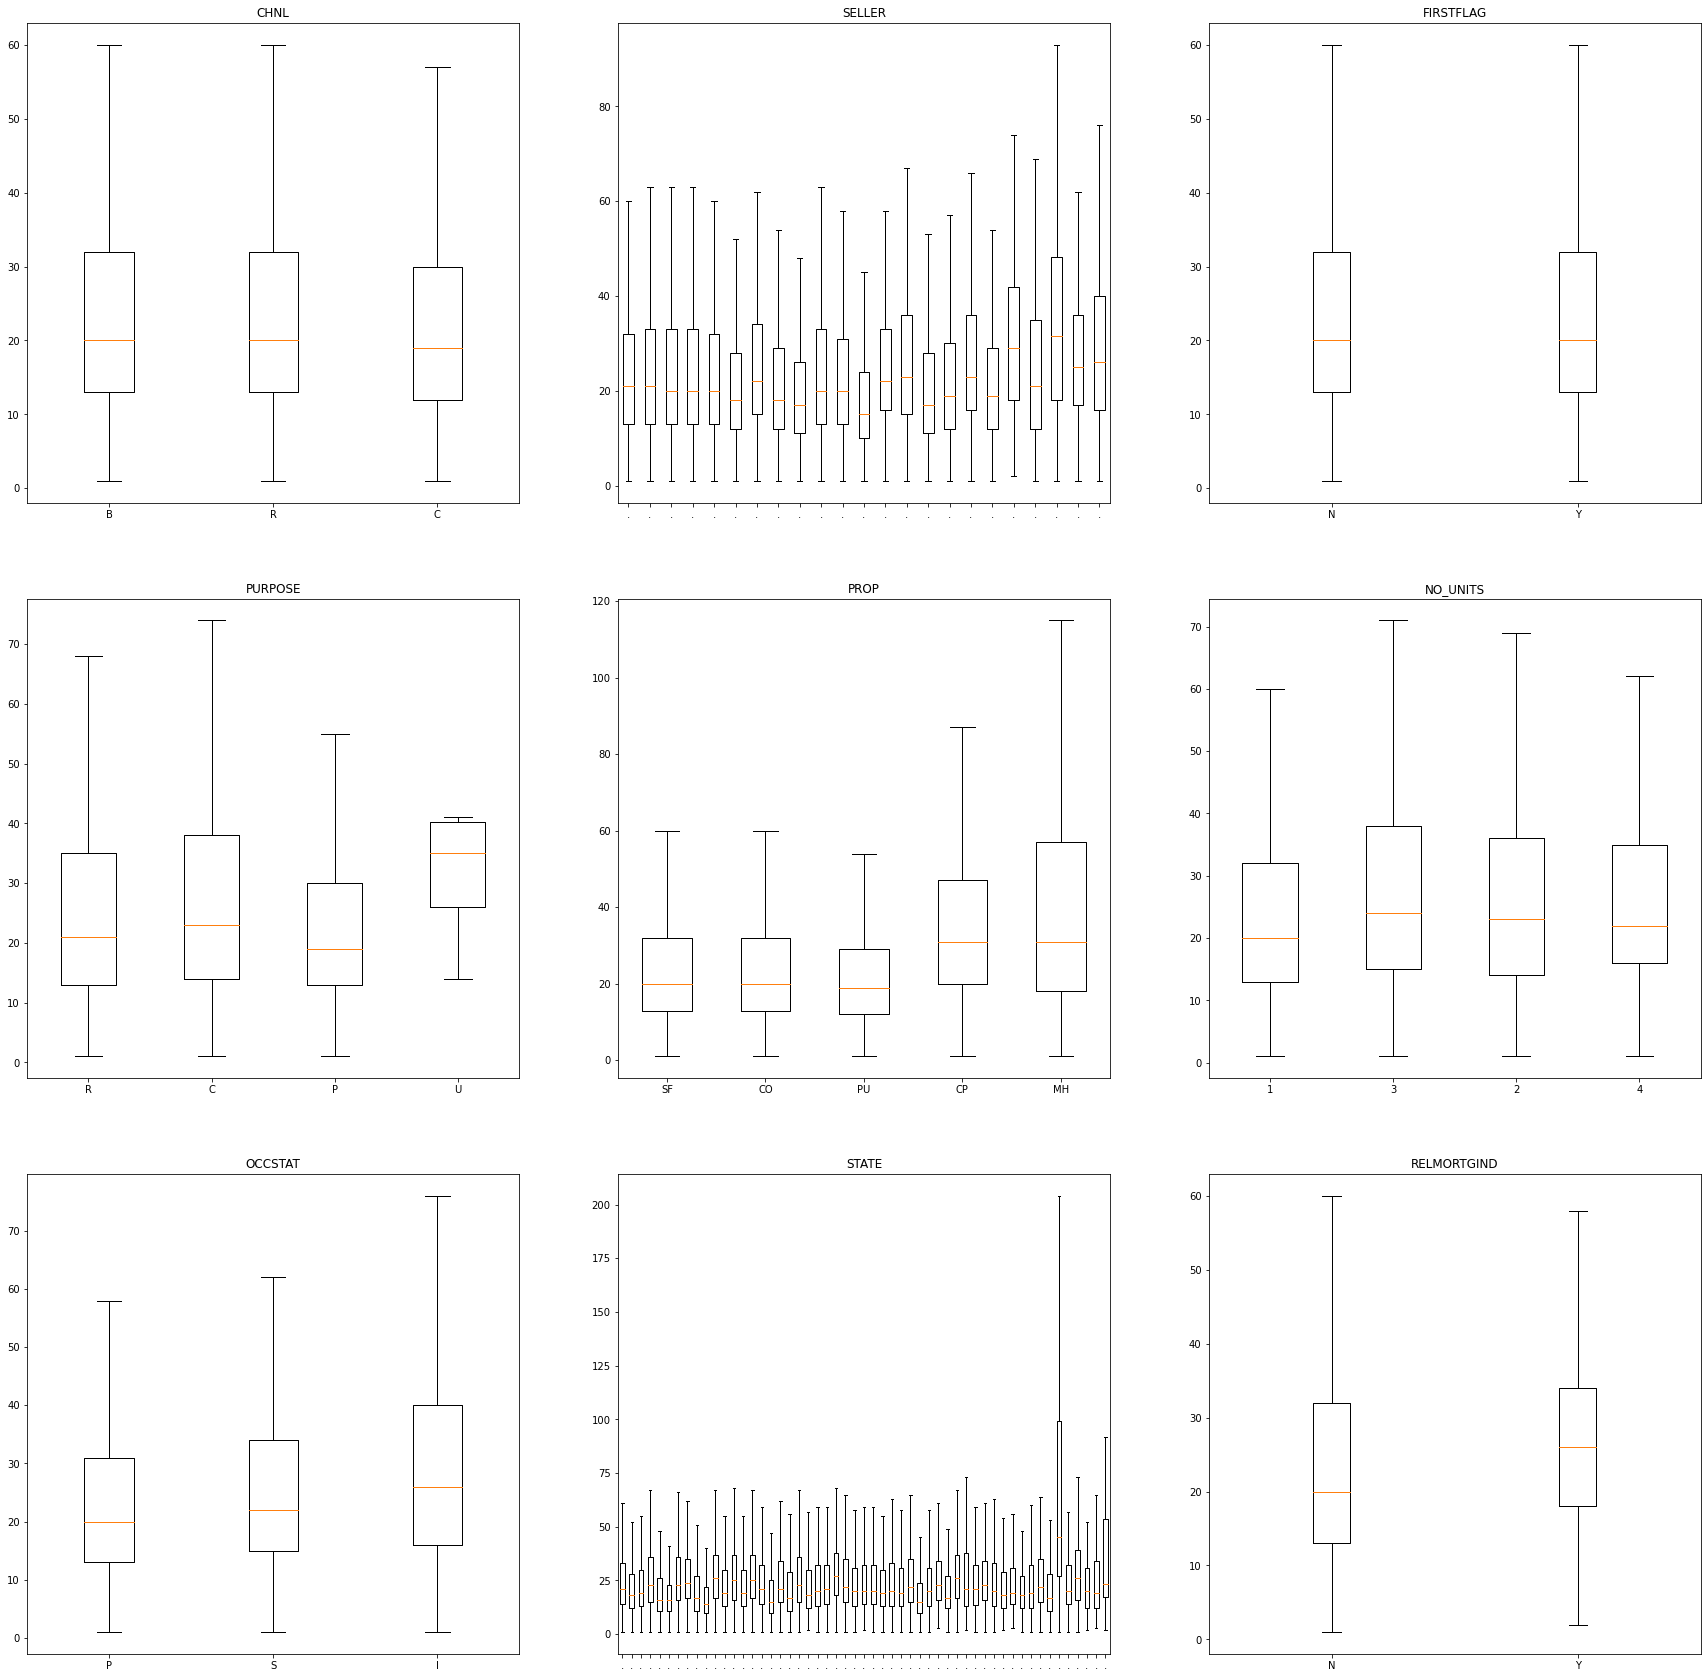

In [111]:
plt.figure(figsize=(30, 30))
for i, name_i in enumerate(list(df_train_1.select_dtypes('object').columns)):
    plt.subplot(3,3,i+1)
    if name_i == 'SELLER' or name_i == 'STATE':
        plt.boxplot([df_train_1[df_train_1[name_i]==type_i]['NMONTHS'] for type_i in df_train_1[name_i].unique()],
                    labels=['.']*len(df_train_1[name_i].unique()),
                    showfliers=False)
        plt.title(name_i)
    else:
        plt.boxplot([df_train_1[df_train_1[name_i]==type_i]['NMONTHS'] for type_i in df_train_1[name_i].unique()],
            labels=df_train_1[name_i].unique(),
            showfliers=False)
        plt.title(name_i)

plt.show()

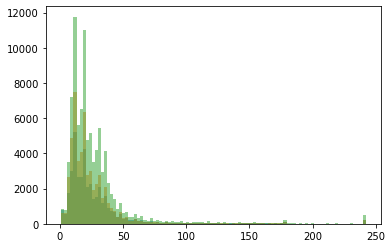

In [93]:
plt.hist(df_train_1[df_train_1['CHNL']=='B']['NMONTHS'], bins=100, alpha=0.5)
plt.hist(df_train_1[df_train_1['CHNL']=='C']['NMONTHS'], bins=100, alpha=0.5)
plt.hist(df_train_1[df_train_1['CHNL']=='R']['NMONTHS'], bins=100, alpha=0.5)
plt.show()

In [63]:
from sklearn.model_selection import train_test_split #划分测试集与训练集
from sklearn.metrics import roc_auc_score #计算AUC得分
from sklearn import metrics #评价指标
import lightgbm as lgb #LGBM

In [64]:
data_all = df_train_1.drop(['CHNL', 'SELLER', 'FIRSTFLAG', 'PURPOSE', 'PROP','NO_UNITS', 'OCCSTAT', 'STATE', 'RELMORTGIND', 'NMONTHS','FORCLOSED'],axis=1)
target_all = df_train_1['FORCLOSED']

#随机选取90%的样本作为训练集，剩下10%的样本作为交叉验证集
train_data, valid_data, train_target, valid_target = train_test_split(data_all,
                                                                      target_all,
                                                                      test_size = 0.1,
                                                                      random_state = 2020)

# create dataset for lightgbm
lgb_train = lgb.Dataset(train_data, train_target)
lgb_eval = lgb.Dataset(valid_data, valid_target, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'auc'},
    'num_leaves': 31, #决策树叶数
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5000,
                valid_sets=(lgb_eval, lgb_train),
                valid_names=('test','train'),
                early_stopping_rounds=100
               )

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')

# predict
y_pred = gbm.predict(valid_data, num_iteration=gbm.best_iteration)

print(roc_auc_score(valid_target,y_pred))

Starting training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	train's auc: 0.793668	test's auc: 0.780283
Training until validation scores don't improve for 100 rounds
[2]	train's auc: 0.813613	test's auc: 0.801314
[3]	train's auc: 0.819388	test's auc: 0.804567
[4]	train's auc: 0.827116	test's auc: 0.813472
[5]	train's auc: 0.830776	test's auc: 0.816071
[6]	train's auc: 0.83583	test's auc: 0.819425
[7]	train's auc: 0.837787	test's auc: 0.819521
[8]	train's auc: 0.841162	test's auc: 0.822263
[9]	train's auc: 0.842956	test's auc: 0.822917
[10]	train's auc: 0.844235	test's auc: 0.824824
[11]	train's auc: 0.846048	test's auc: 0.824693
[12]	train's auc: 0.85024	test's auc: 0.827794
[13]	train's auc: 0.852638	test's auc: 0.82838
[14]	train's auc: 0.854175	test's auc: 0.828407
[15]	train's auc: 0.855702	t

In [65]:
column_list_full_dict = dict()
for name_i in list(df_train_1.columns):
    try:
        full_name_i = columns_name_dict[name_i]
        column_list_full_dict[name_i] = full_name_i
    except:
        column_list_full_dict[name_i] = 'NULL'

In [66]:
column_list_full_dict

{'CHNL': 'CHANNEL',
 'SELLER': 'SELLER',
 'ORIGRATE': 'ORIG_RATE',
 'ORIGUPB': 'ORIG_UPB',
 'ORIGTERM': 'ORIG_TERM',
 'LOANAGE': 'LOAN_AGE',
 'REMMNTHS': 'REM_MONTHS',
 'ADJRMTHS': 'ADJ_REM_MONTHS',
 'OLTV': 'OLTV',
 'NUMBO': 'NUM_BO',
 'DTI': 'DTI',
 'CSCOREB': 'CSCORE_B',
 'FIRSTFLAG': 'FIRST_FLAG',
 'PURPOSE': 'PURPOSE',
 'PROP': 'PROP',
 'NO_UNITS': 'NO_UNITS',
 'OCCSTAT': 'OCC_STAT',
 'STATE': 'STATE',
 'DLQSTATUS': 'DLQ_STATUS',
 'RELMORTGIND': 'RELOCATION_MORTGAGE_INDICATOR',
 'ACTPER_MO': 'NULL',
 'GAP': 'NULL',
 'TIMGAP1': 'NULL',
 'TIMGAP2': 'NULL',
 'NMONTHS': 'NULL',
 'FORCLOSED': 'NULL'}

In [67]:
feature_columns_list = list(df_train_1.drop(['NMONTHS', 'FORCLOSED'], axis=1).columns)
feature_columns_list

['CHNL',
 'SELLER',
 'ORIGRATE',
 'ORIGUPB',
 'ORIGTERM',
 'LOANAGE',
 'REMMNTHS',
 'ADJRMTHS',
 'OLTV',
 'NUMBO',
 'DTI',
 'CSCOREB',
 'FIRSTFLAG',
 'PURPOSE',
 'PROP',
 'NO_UNITS',
 'OCCSTAT',
 'STATE',
 'DLQSTATUS',
 'RELMORTGIND',
 'ACTPER_MO',
 'GAP',
 'TIMGAP1',
 'TIMGAP2']

In [68]:
feature_columns_list_object = list(df_train_1.select_dtypes('object').columns)
feature_columns_list_object

['CHNL',
 'SELLER',
 'FIRSTFLAG',
 'PURPOSE',
 'PROP',
 'NO_UNITS',
 'OCCSTAT',
 'STATE',
 'RELMORTGIND']

In [69]:
feature_columns_list_num = []
for name_i in feature_columns_list:
    if name_i not in feature_columns_list_object:
        feature_columns_list_num.append(name_i)
feature_columns_list_num

['ORIGRATE',
 'ORIGUPB',
 'ORIGTERM',
 'LOANAGE',
 'REMMNTHS',
 'ADJRMTHS',
 'OLTV',
 'NUMBO',
 'DTI',
 'CSCOREB',
 'DLQSTATUS',
 'ACTPER_MO',
 'GAP',
 'TIMGAP1',
 'TIMGAP2']

In [70]:
X = df_train_1.loc[:, feature_columns_list_num].values
Z_mat = (X-X.mean(axis=0))/X.std(axis=0)
corr_mat = Z_mat.T.dot(Z_mat)/Z_mat.shape[0]
df_corr = pd.DataFrame(corr_mat)
df_corr.columns = feature_columns_list_num # 因子名称列表
df_corr.index = feature_columns_list_num
df_corr

,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,REMMNTHS,ADJRMTHS,OLTV,NUMBO,DTI,CSCOREB,DLQSTATUS,ACTPER_MO,GAP,TIMGAP1,TIMGAP2
ORIGRATE,1.000000,-0.103004,0.285693,-0.294109,0.290721,0.289559,0.147515,-0.074162,0.061302,-0.155093,0.002356,0.009730,0.003449,-0.019202,0.285693
ORIGUPB,-0.103004,1.000000,0.202568,-0.011580,0.202672,0.202951,0.181058,0.198561,0.127334,0.032621,-0.000284,0.021853,-0.001597,0.005030,0.202568
ORIGTERM,0.285693,0.202568,1.000000,-0.018988,0.999846,0.992878,0.318991,-0.030776,0.104384,-0.034608,0.002072,0.022995,0.054208,-0.017167,1.000000
LOANAGE,-0.294109,-0.011580,-0.018988,1.000000,-0.036550,-0.039753,0.002111,-0.000640,-0.016750,-0.011195,0.033236,-0.002149,0.049411,-0.091163,-0.018988
REMMNTHS,0.290721,0.202672,0.999846,-0.036550,1.000000,0.993092,0.318798,-0.030750,0.104627,-0.034394,0.001487,0.023022,0.053313,-0.015557,0.999846
ADJRMTHS,0.289559,0.202951,0.992878,-0.039753,0.993092,1.000000,0.318942,-0.031005,0.105656,-0.038449,0.002451,0.022150,0.052747,-0.015806,0.992878
OLTV,0.147515,0.181058,0.318991,0.002111,0.318798,0.318942,1.000000,-0.035595,0.119196,-0.126226,-0.002380,0.007257,-0.002957,-0.032882,0.318991
NUMBO,-0.074162,0.198561,-0.030776,-0.000640,-0.030750,-0.031005,-0.035595,1.000000,-0.101204,0.044768,-0.009483,0.005901,0.000961,0.003641,-0.030776
DTI,0.061302,0.127334,0.104384,-0.016750,0.104627,0.105656,0.119196,-0.101204,1.000000,-0.107790,0.005398,-0.003080,0.018259,0.000305,0.104384
CSCOREB,-0.155093,0.032621,-0.034608,-0.011195,-0.034394,-0.038449,-0.126226,0.044768,-0.107790,1.000000,-0.015976,0.014463,0.001451,-0.003927,-0.034608


In [71]:
feature_columns_list_num_1 = ['ORIGRATE',
 'ORIGUPB',
 'ORIGTERM',
 'LOANAGE',
 'REMMNTHS',
 'ADJRMTHS',
 'OLTV',
 'NUMBO',
 'DTI',
 'CSCOREB',
 'DLQSTATUS',
 'ACTPER_MO',
 'GAP',
 'TIMGAP1']

In [72]:
X = df_train_1.loc[:, feature_columns_list_num_1].values
Z_mat = (X-X.mean(axis=0))/X.std(axis=0)
corr_mat = Z_mat.T.dot(Z_mat)/Z_mat.shape[0]
df_corr = pd.DataFrame(corr_mat)
df_corr.columns = feature_columns_list_num_1 # 因子名称列表
df_corr.index = feature_columns_list_num_1
df_corr

,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,REMMNTHS,ADJRMTHS,OLTV,NUMBO,DTI,CSCOREB,DLQSTATUS,ACTPER_MO,GAP,TIMGAP1
ORIGRATE,1.000000,-0.103004,0.285693,-0.294109,0.290721,0.289559,0.147515,-0.074162,0.061302,-0.155093,0.002356,0.009730,0.003449,-0.019202
ORIGUPB,-0.103004,1.000000,0.202568,-0.011580,0.202672,0.202951,0.181058,0.198561,0.127334,0.032621,-0.000284,0.021853,-0.001597,0.005030
ORIGTERM,0.285693,0.202568,1.000000,-0.018988,0.999846,0.992878,0.318991,-0.030776,0.104384,-0.034608,0.002072,0.022995,0.054208,-0.017167
LOANAGE,-0.294109,-0.011580,-0.018988,1.000000,-0.036550,-0.039753,0.002111,-0.000640,-0.016750,-0.011195,0.033236,-0.002149,0.049411,-0.091163
REMMNTHS,0.290721,0.202672,0.999846,-0.036550,1.000000,0.993092,0.318798,-0.030750,0.104627,-0.034394,0.001487,0.023022,0.053313,-0.015557
ADJRMTHS,0.289559,0.202951,0.992878,-0.039753,0.993092,1.000000,0.318942,-0.031005,0.105656,-0.038449,0.002451,0.022150,0.052747,-0.015806
OLTV,0.147515,0.181058,0.318991,0.002111,0.318798,0.318942,1.000000,-0.035595,0.119196,-0.126226,-0.002380,0.007257,-0.002957,-0.032882
NUMBO,-0.074162,0.198561,-0.030776,-0.000640,-0.030750,-0.031005,-0.035595,1.000000,-0.101204,0.044768,-0.009483,0.005901,0.000961,0.003641
DTI,0.061302,0.127334,0.104384,-0.016750,0.104627,0.105656,0.119196,-0.101204,1.000000,-0.107790,0.005398,-0.003080,0.018259,0.000305
CSCOREB,-0.155093,0.032621,-0.034608,-0.011195,-0.034394,-0.038449,-0.126226,0.044768,-0.107790,1.000000,-0.015976,0.014463,0.001451,-0.003927


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False

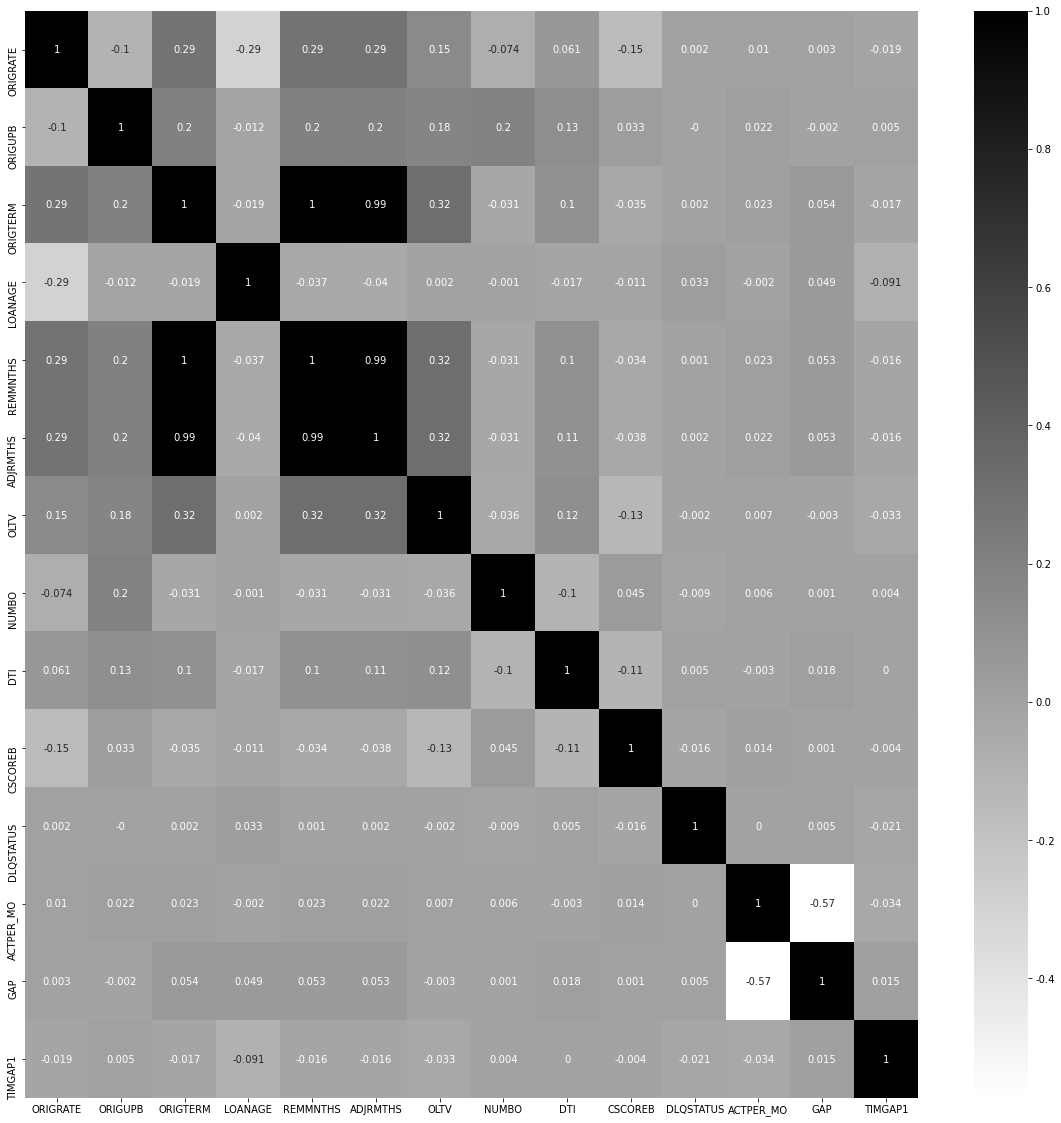

In [74]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr.round(3), cmap='binary', annot=True)
plt.show()

In [75]:
X = df_train_1.loc[:,  ['ORIGTERM', 'REMMNTHS','ADJRMTHS']].values
Z_mat = (X-X.mean(axis=0))/X.std(axis=0)
corr_mat = Z_mat.T.dot(Z_mat)/Z_mat.shape[0]
df_corr = pd.DataFrame(corr_mat)
df_corr.columns = ['ORIGTERM', 'REMMNTHS','ADJRMTHS'] # 因子名称列表
df_corr.index = ['ORIGTERM', 'REMMNTHS','ADJRMTHS']
df_corr

,ORIGTERM,REMMNTHS,ADJRMTHS
ORIGTERM,1.000000,0.999846,0.992878
REMMNTHS,0.999846,1.000000,0.993092
ADJRMTHS,0.992878,0.993092,1.000000


In [76]:
feature_columns_list_num_2 = ['ORIGRATE',
 'ORIGUPB',
 'ORIGTERM',
 'LOANAGE',
 'OLTV',
 'NUMBO',
 'DTI',
 'CSCOREB',
 'DLQSTATUS',
 'ACTPER_MO',
 'GAP',
 'TIMGAP1']

In [77]:
X = df_train_1.loc[:, feature_columns_list_num_2].values
Z_mat = (X-X.mean(axis=0))/X.std(axis=0)
corr_mat = Z_mat.T.dot(Z_mat)/Z_mat.shape[0]
df_corr = pd.DataFrame(corr_mat)
df_corr.columns = feature_columns_list_num_2 # 因子名称列表
df_corr.index = feature_columns_list_num_2
df_corr

,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,OLTV,NUMBO,DTI,CSCOREB,DLQSTATUS,ACTPER_MO,GAP,TIMGAP1
ORIGRATE,1.000000,-0.103004,0.285693,-0.294109,0.147515,-0.074162,0.061302,-0.155093,0.002356,0.009730,0.003449,-0.019202
ORIGUPB,-0.103004,1.000000,0.202568,-0.011580,0.181058,0.198561,0.127334,0.032621,-0.000284,0.021853,-0.001597,0.005030
ORIGTERM,0.285693,0.202568,1.000000,-0.018988,0.318991,-0.030776,0.104384,-0.034608,0.002072,0.022995,0.054208,-0.017167
LOANAGE,-0.294109,-0.011580,-0.018988,1.000000,0.002111,-0.000640,-0.016750,-0.011195,0.033236,-0.002149,0.049411,-0.091163
OLTV,0.147515,0.181058,0.318991,0.002111,1.000000,-0.035595,0.119196,-0.126226,-0.002380,0.007257,-0.002957,-0.032882
NUMBO,-0.074162,0.198561,-0.030776,-0.000640,-0.035595,1.000000,-0.101204,0.044768,-0.009483,0.005901,0.000961,0.003641
DTI,0.061302,0.127334,0.104384,-0.016750,0.119196,-0.101204,1.000000,-0.107790,0.005398,-0.003080,0.018259,0.000305
CSCOREB,-0.155093,0.032621,-0.034608,-0.011195,-0.126226,0.044768,-0.107790,1.000000,-0.015976,0.014463,0.001451,-0.003927
DLQSTATUS,0.002356,-0.000284,0.002072,0.033236,-0.002380,-0.009483,0.005398,-0.015976,1.000000,0.000102,0.004751,-0.020529
ACTPER_MO,0.009730,0.021853,0.022995,-0.002149,0.007257,0.005901,-0.003080,0.014463,0.000102,1.000000,-0.573479,-0.034145


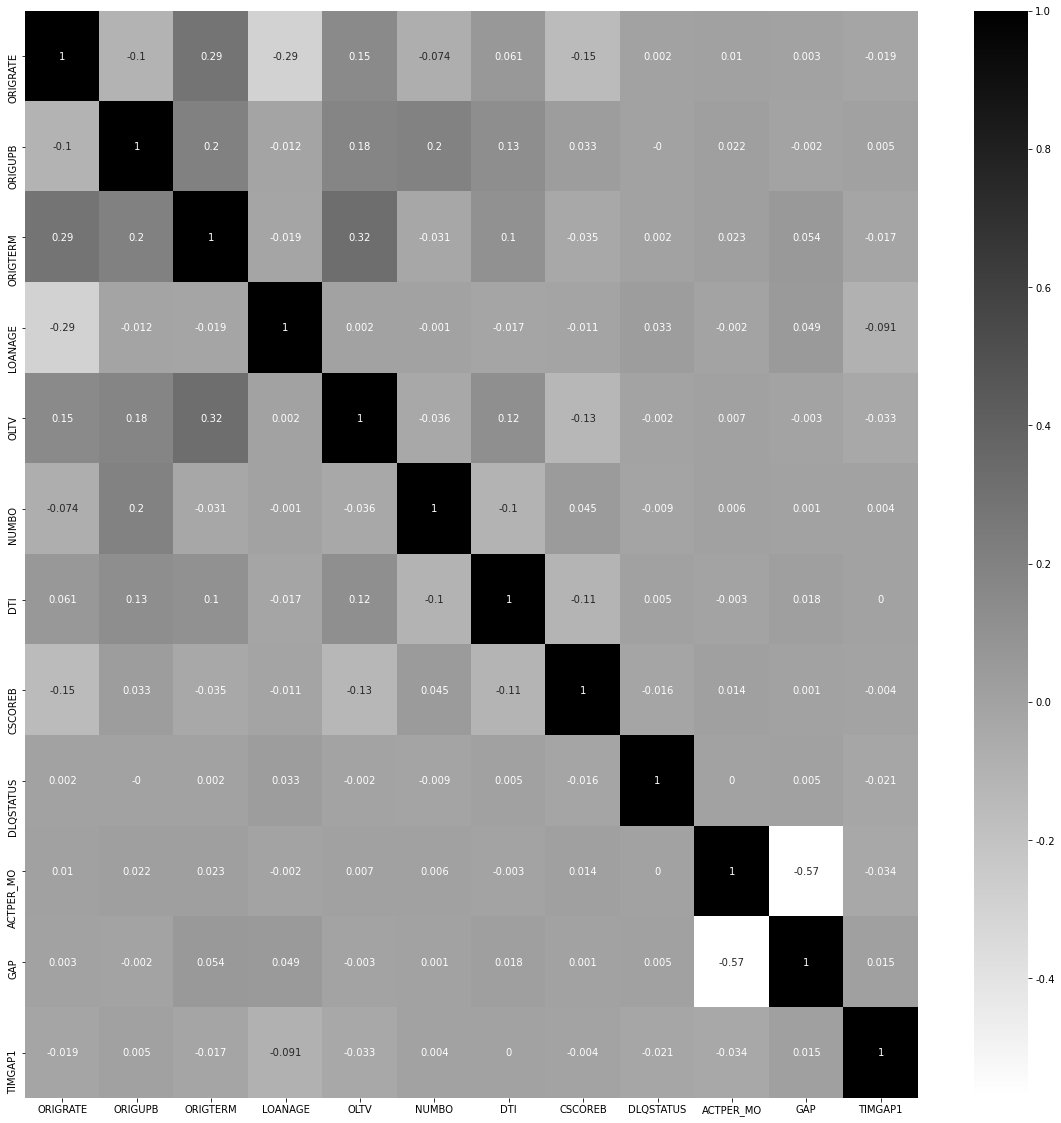

In [78]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr.round(3), cmap='binary', annot=True)
plt.show()

In [79]:
vif = np.diag(np.linalg.inv(Z_mat.T.dot(Z_mat)/Z_mat.shape[0]))
df_vif = pd.DataFrame({'VIF': vif, 'R_square': 1-1/vif})
df_vif.index = feature_columns_list_num_2
df_vif

,VIF,R_square
ORIGRATE,1.282092,0.220025
ORIGUPB,1.169720,0.145095
ORIGTERM,1.259915,0.206295
LOANAGE,1.126511,0.112303
OLTV,1.164714,0.141420
NUMBO,1.066641,0.062478
DTI,1.056423,0.053409
CSCOREB,1.053285,0.050590
DLQSTATUS,1.001906,0.001903
ACTPER_MO,1.500951,0.333756


In [81]:
df_vif.round(4)

,VIF,R_square
ORIGRATE,1.2821,0.2200
ORIGUPB,1.1697,0.1451
ORIGTERM,1.2599,0.2063
LOANAGE,1.1265,0.1123
OLTV,1.1647,0.1414
NUMBO,1.0666,0.0625
DTI,1.0564,0.0534
CSCOREB,1.0533,0.0506
DLQSTATUS,1.0019,0.0019
ACTPER_MO,1.5010,0.3338


In [80]:
from sklearn import svm  # svm支持向量机
from sklearn.model_selection import train_test_split #划分测试集与训练集
from sklearn.metrics import roc_auc_score #计算AUC得分
from sklearn import metrics #评价指标
from sklearn.preprocessing import LabelEncoder #整数编码
import lightgbm as lgb #LGBM
from sklearn.decomposition import PCA #主成分分析

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [319]:
train_data_org = df_train_1.drop(['REMMNTHS','ADJRMTHS', 'TIMGAP2', 'FORCLOSED', 'NMONTHS'], axis=1)
train_data_org

,CHNL,SELLER,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,OLTV,NUMBO,DTI,CSCOREB,...,PURPOSE,PROP,NO_UNITS,OCCSTAT,STATE,DLQSTATUS,RELMORTGIND,ACTPER_MO,GAP,TIMGAP1
LID,,,,,,,,,,,,,,,,,,,,,
946681740815,B,"Jpmorgan Chase Bank, National Association",8.000,100000.0,360,1,51.0,2.0,19.0,704.0,...,R,SF,1,P,GA,0,N,4,0,2
921089628109,R,"Gmac Mortgage, Llc",7.625,100000.0,180,0,80.0,1.0,35.0,725.0,...,C,SF,1,P,CA,0,N,4,0,2
738779422112,C,"Flagstar Bank, Fsb",8.000,226000.0,180,1,80.0,2.0,42.0,772.0,...,P,SF,1,P,WA,0,N,4,0,2
615798070845,R,Other,8.205,143000.0,360,0,77.0,2.0,33.0,674.0,...,P,SF,1,P,NM,0,N,3,1,2
345601060557,R,Other,8.500,46000.0,360,0,80.0,2.0,21.0,753.0,...,C,SF,1,P,IL,0,N,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562335400010,R,"Bank Of America, N.A.",8.250,96000.0,360,0,80.0,1.0,35.0,616.0,...,P,SF,1,P,AZ,0,N,3,1,2
151011432193,C,Suntrust Mortgage Inc.,8.875,86000.0,360,0,59.0,2.0,46.0,602.0,...,C,SF,1,P,MI,0,N,3,0,2
517753415065,R,Bishops Gate Residential Mortgage Trust,8.500,70000.0,360,0,64.0,1.0,53.0,596.0,...,C,SF,1,P,NJ,0,N,5,0,2


In [345]:
df_onehot = pd.get_dummies(train_data_org.select_dtypes('object'), drop_first=True)
train_data = pd.concat([df_onehot, train_data_org.drop(list(train_data_org.select_dtypes('object').columns), axis=1)], axis=1)
train_data

,CHNL_C,CHNL_R,"SELLER_Bank Of America, N.A.",SELLER_Bishops Gate Residential Mortgage Trust,"SELLER_Citimortgage, Inc.","SELLER_Downey Savings And Loan Association, F.A.",SELLER_First Tennessee Bank National Association,"SELLER_Flagstar Bank, Fsb","SELLER_Gmac Mortgage, Llc","SELLER_Harwood Street Funding I, Llc",...,ORIGTERM,LOANAGE,OLTV,NUMBO,DTI,CSCOREB,DLQSTATUS,ACTPER_MO,GAP,TIMGAP1
LID,,,,,,,,,,,,,,,,,,,,,
946681740815,0,0,0,0,0,0,0,0,0,0,...,360,1,51.0,2.0,19.0,704.0,0,4,0,2
921089628109,0,1,0,0,0,0,0,0,1,0,...,180,0,80.0,1.0,35.0,725.0,0,4,0,2
738779422112,1,0,0,0,0,0,0,1,0,0,...,180,1,80.0,2.0,42.0,772.0,0,4,0,2
615798070845,0,1,0,0,0,0,0,0,0,0,...,360,0,77.0,2.0,33.0,674.0,0,3,1,2
345601060557,0,1,0,0,0,0,0,0,0,0,...,360,0,80.0,2.0,21.0,753.0,0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562335400010,0,1,1,0,0,0,0,0,0,0,...,360,0,80.0,1.0,35.0,616.0,0,3,1,2
151011432193,1,0,0,0,0,0,0,0,0,0,...,360,0,59.0,2.0,46.0,602.0,0,3,0,2
517753415065,0,1,0,1,0,0,0,0,0,0,...,360,0,64.0,1.0,53.0,596.0,0,5,0,2


In [343]:
target_data = df_train_1['FORCLOSED']

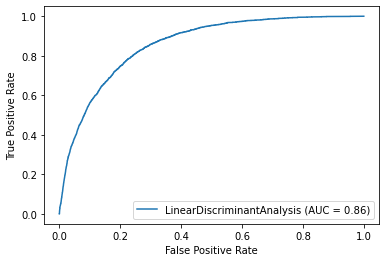

In [340]:
metrics.plot_roc_curve(lda_fit, train_data, target_data)

In [390]:
k_fold = KFold(n_splits=10,shuffle=True,random_state=2020)
clf_dict = {'LDA': LDA(),
            #'QDA': QDA(),
            'GNB': GNB(), 
            'DecisionTree': DecisionTreeClassifier(max_depth=10),
            'RandomForest': RandomForestClassifier(n_estimators=10, max_depth=10),
            'LogisticRegression': LogisticRegression()
           }
   
for method_i in list(clf_dict.keys()):
    Cpred = []
    clf = clf_dict[method_i]
    for k, (train, test) in enumerate(k_fold.split(train_data)):
        Cpred_k = clf.fit(train_data.iloc[train], target_data.iloc[train])
        auc_k = roc_auc_score(target_data.iloc[test], Cpred_k.predict_proba(train_data.iloc[test])[:,1])
        Cpred.append(auc_k)
        print(f"Test {k+1} auc score of {method_i}:{Cpred[k]}")
    print(f"The mean of auc score for {method_i} is {np.mean(Cpred)}")
    print('\n')

Test 1 auc score of LDA:0.8519276824543741
Test 2 auc score of LDA:0.866781454531203
Test 3 auc score of LDA:0.8676727895228794
Test 4 auc score of LDA:0.841902565335417
Test 5 auc score of LDA:0.8543324254429404
Test 6 auc score of LDA:0.8591762194343636
Test 7 auc score of LDA:0.8515828333221176
Test 8 auc score of LDA:0.8425235552174375
Test 9 auc score of LDA:0.8527326698981179
Test 10 auc score of LDA:0.8360470082145074
The mean of auc score for LDA is 0.8524679203373358


Test 1 auc score of GNB:0.7921545876263945
Test 2 auc score of GNB:0.8186181039100161
Test 3 auc score of GNB:0.818495646785763
Test 4 auc score of GNB:0.8144794703048153
Test 5 auc score of GNB:0.7798773889439125
Test 6 auc score of GNB:0.8148839322622992
Test 7 auc score of GNB:0.8057722422388377
Test 8 auc score of GNB:0.805701782775069
Test 9 auc score of GNB:0.80446051702452
Test 10 auc score of GNB:0.7913872778258194
The mean of auc score for GNB is 0.8045830949697447


Test 1 auc score of DecisionTree:0.7

In [391]:
k_fold = KFold(n_splits=10,shuffle=True,random_state=2020)
clf_dict = {'LDA': LDA(),
            #'QDA': QDA(),
            'GNB': GNB(), 
            'DecisionTree': DecisionTreeClassifier(max_depth=10),
            'RandomForest': RandomForestClassifier(n_estimators=10, max_depth=10),
            'LogisticRegression': LogisticRegression()
           }
   
for method_i in list(clf_dict.keys()):
    Cpred = []
    clf = clf_dict[method_i]
    for k, (train, test) in enumerate(k_fold.split(train_data)):
        Cpred_k = clf.fit(train_data.iloc[train], target_data.iloc[train])
        Cpred.append(clf.score(train_data.iloc[test], target_data.iloc[test]))
        print(f"Test {k+1} accuracy of {method_i}:{Cpred[k]}")
    print(f"The mean of accuracy for {method_i} is {np.mean(Cpred)}")
    print('\n')

Test 1 accuracy of LDA:0.9861721854304636
Test 2 accuracy of LDA:0.9857483443708609
Test 3 accuracy of LDA:0.9882377874324467
Test 4 accuracy of LDA:0.9855886404577726
Test 5 accuracy of LDA:0.9850588110628378
Test 6 accuracy of LDA:0.9848998622443573
Test 7 accuracy of LDA:0.9847409134258769
Test 8 accuracy of LDA:0.9870721627635901
Test 9 accuracy of LDA:0.9855886404577726
Test 10 accuracy of LDA:0.9863833845501748
The mean of accuracy for LDA is 0.9859490732196153


Test 1 accuracy of GNB:0.9901456953642385
Test 2 accuracy of GNB:0.9890860927152317
Test 3 accuracy of GNB:0.9890855144643425
Test 4 accuracy of GNB:0.9886616509483946
Test 5 accuracy of GNB:0.987496026279538
Test 6 accuracy of GNB:0.9879728727349794
Test 7 accuracy of GNB:0.987601992158525
Test 8 accuracy of GNB:0.9903571050121861
Test 9 accuracy of GNB:0.9876549750980185
Test 10 accuracy of GNB:0.9883437533114338
The mean of accuracy for GNB is 0.9886405678086888


Test 1 accuracy of DecisionTree:0.9888741721854305
Tes

In [347]:
log_mod = LogisticRegression().fit(train_data, target_data)

In [350]:
y_pred_proba = log_mod.predict_proba(train_data)[:,1]

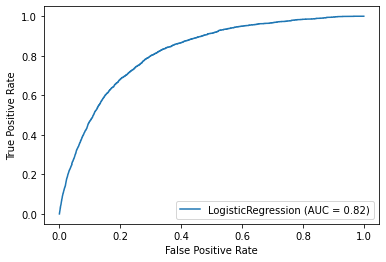

In [375]:
metrics.plot_roc_curve(log_mod, train_data, target_data)

In [379]:
fpr, tpr, thresholds = metrics.roc_curve(target_data, y_pred_proba)

In [385]:
thresholds[np.argmax(tpr-fpr)], tpr[np.argmax(tpr-fpr)], fpr[np.argmax(tpr-fpr)]

(0.011823269785390363, 0.7813670411985019, 0.2807841119792504)

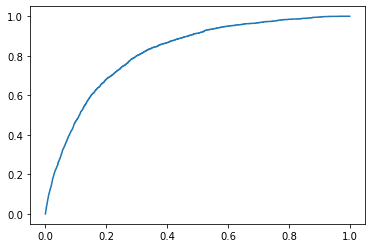

In [388]:
plt.plot(fpr, tpr)
plt.show()

In [389]:
print(metrics.classification_report(target_data, y_pred_proba>thresholds[np.argmax(tpr-fpr)]))

              precision    recall  f1-score   support

       False       1.00      0.72      0.84    186606
        True       0.03      0.78      0.06      2136

    accuracy                           0.72    188742
   macro avg       0.51      0.75      0.45    188742
weighted avg       0.99      0.72      0.83    188742



In [28]:
x_mat = np.array([[1,0,2], [0,2,1], [1,2,3]]).T
x_mat

array([[1, 0, 1],
       [0, 2, 2],
       [2, 1, 3]])

In [29]:
pd.DataFrame(x_mat).corr()

,0,1,2
0,1.0,-0.5,0.5
1,-0.5,1.0,0.5
2,0.5,0.5,1.0


In [117]:
df_train_1.select_dtypes('object')

,CHNL,SELLER,FIRSTFLAG,PURPOSE,PROP,NO_UNITS,OCCSTAT,STATE,RELMORTGIND
LID,,,,,,,,,
946681740815,B,"Jpmorgan Chase Bank, National Association",N,R,SF,1,P,GA,N
921089628109,R,"Gmac Mortgage, Llc",N,C,SF,1,P,CA,N
738779422112,C,"Flagstar Bank, Fsb",N,P,SF,1,P,WA,N
615798070845,R,Other,N,P,SF,1,P,NM,N
345601060557,R,Other,N,C,SF,1,P,IL,N
...,...,...,...,...,...,...,...,...,...
562335400010,R,"Bank Of America, N.A.",Y,P,SF,1,P,AZ,N
151011432193,C,Suntrust Mortgage Inc.,N,C,SF,1,P,MI,N
517753415065,R,Bishops Gate Residential Mortgage Trust,N,C,SF,1,P,NJ,N


In [121]:
df_train_1.drop(list(df_train_1.select_dtypes('object').columns), axis=1)

,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,REMMNTHS,ADJRMTHS,OLTV,NUMBO,DTI,CSCOREB,DLQSTATUS,ACTPER_MO,GAP,TIMGAP1,TIMGAP2,NMONTHS,FORCLOSED
LID,,,,,,,,,,,,,,,,,
946681740815,8.000,100000.0,360,1,359,359,51.0,2.0,19.0,704.0,0,4,0,2,359,17,False
921089628109,7.625,100000.0,180,0,180,180,80.0,1.0,35.0,725.0,0,4,0,2,179,32,False
738779422112,8.000,226000.0,180,1,179,178,80.0,2.0,42.0,772.0,0,4,0,2,179,19,False
615798070845,8.205,143000.0,360,0,360,360,77.0,2.0,33.0,674.0,0,3,1,2,359,21,False
345601060557,8.500,46000.0,360,0,360,360,80.0,2.0,21.0,753.0,0,3,1,2,359,17,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562335400010,8.250,96000.0,360,0,360,360,80.0,1.0,35.0,616.0,0,3,1,2,359,14,False
151011432193,8.875,86000.0,360,0,360,360,59.0,2.0,46.0,602.0,0,3,0,2,359,23,False
517753415065,8.500,70000.0,360,0,360,359,64.0,1.0,53.0,596.0,0,5,0,2,359,17,False
